# Use Scence Classification Layer to calulate cloud percentage and  list date that have ≤ 30 cloud coverage percentage

In [30]:
import os
import json
import rasterio
from matplotlib import pyplot as plt
import numpy as np
import subprocess

In [23]:
import shutil
shutil.rmtree('/home/jupyter/Sentinel2_Data/Composite_Normalize')

In [2]:
'''
Folder contains data of each date store in same heirachy as sentinel 2 hub

Ex:

root_dir
        2022-10-15
            R10m
                ...jp2
            R60m
                ...jp2
            R20m
                ...jp2
            tileInfo.json
            productInfo.json
            metadata.xml
        2022-10-02
            R10m
                ...jp2
            R60m
                ...jp2
            R20m
                ...jp2
            tileInfo.json
            productInfo.json
            metadata.xml
        .
        .
        .
'''

root_dir = '/home/jupyter/gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ'
years = ['2020','2021']

In [3]:
clean_data = []
for year in years:
    date = sorted(os.listdir(root_dir))
    for data in date:
        if data.startswith(year):
            try:
                with rasterio.open(os.path.join(root_dir,data)+'/R20m/SCL.jp2') as f:
                    SCL = f.read()
                    #print(SCL.shape[1]*SCL.shape[2])
                    cloud_medium = len(SCL[SCL == 8])
                    cloud_high = len(SCL[SCL == 9])
                    cloud_sum = cloud_medium + cloud_high
                    cloud_percentage = (cloud_sum/(SCL.shape[1]*SCL.shape[2]))*100
                    print(f'{data} has cloud {int(cloud_percentage)} %')
                    if cloud_percentage <= 50.0:
                        clean_data.append(data)
            except:
                continue

2020-1-12 has cloud 17 %
2020-1-17 has cloud 2 %
2020-1-2 has cloud 1 %
2020-1-22 has cloud 4 %
2020-1-27 has cloud 14 %
2020-1-7 has cloud 0 %
2020-10-13 has cloud 100 %
2020-10-18 has cloud 98 %
2020-10-23 has cloud 25 %
2020-10-28 has cloud 100 %
2020-10-3 has cloud 87 %
2020-10-8 has cloud 99 %
2020-11-12 has cloud 92 %
2020-11-17 has cloud 8 %
2020-11-2 has cloud 4 %
2020-11-22 has cloud 67 %
2020-11-27 has cloud 22 %
2020-11-7 has cloud 84 %
2020-12-12 has cloud 33 %
2020-12-17 has cloud 13 %
2020-12-2 has cloud 59 %
2020-12-22 has cloud 4 %
2020-12-27 has cloud 11 %
2020-12-7 has cloud 3 %
2020-2-1 has cloud 1 %
2020-2-11 has cloud 89 %
2020-2-16 has cloud 3 %
2020-2-21 has cloud 0 %
2020-2-26 has cloud 10 %
2020-2-6 has cloud 31 %
2020-3-12 has cloud 8 %
2020-3-17 has cloud 71 %
2020-3-2 has cloud 42 %
2020-3-22 has cloud 22 %
2020-3-27 has cloud 14 %
2020-3-7 has cloud 22 %
2020-4-1 has cloud 0 %
2020-4-11 has cloud 52 %
2020-4-16 has cloud 72 %
2020-4-21 has cloud 25 %
2020-4

In [4]:
filter_date_2020 = ['11','12']
filter_date_2021 = ['1','2','3','4']

In [5]:
clean_data_filter = []
for date in clean_data:
    if ((date.split('-')[1]) in filter_date_2020) and ((date.split('-')[0]) == '2020'):
        clean_data_filter.append(date)
    elif ((date.split('-')[1]) in filter_date_2021) and ((date.split('-')[0]) == '2021'):
        clean_data_filter.append(date)

In [6]:
clean_data_filter

['2020-11-17',
 '2020-11-2',
 '2020-11-27',
 '2020-12-12',
 '2020-12-17',
 '2020-12-22',
 '2020-12-27',
 '2020-12-7',
 '2021-1-1',
 '2021-1-11',
 '2021-1-16',
 '2021-1-26',
 '2021-1-31',
 '2021-1-6',
 '2021-2-10',
 '2021-2-15',
 '2021-2-20',
 '2021-2-25',
 '2021-2-5',
 '2021-3-12',
 '2021-3-17',
 '2021-3-2',
 '2021-3-7',
 '2021-4-21']

In [ ]:
gsutil cp -r dir gs://my-bucket

In [10]:
for date in clean_data_filter:
    subprocess.run(
['gsutil' , 'cp' ,'-r' ,f'gs://varuna-data-nonprod-analytic/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/{date}' , '/home/jupyter/Sentinel2_Data/47PQQ'])

Copying gs://varuna-data-nonprod-analytic/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-11-17/R10m/AOT.jp2...
Copying gs://varuna-data-nonprod-analytic/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-11-17/R10m/B02.jp2...
Copying gs://varuna-data-nonprod-analytic/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-11-17/R10m/B03.jp2...
Copying gs://varuna-data-nonprod-analytic/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-11-17/R10m/B04.jp2...
\ [4 files][343.5 MiB/343.5 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://varuna-data-nonprod-analytic/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-11-17/R10m/B08.jp2...
Copying gs://varuna-data-nonprod

In [ ]:
python preprocessing_sentinel2.py --input-path /home/jupyter/Sentinel2_Data/Composite_median/47QMA_composite.tif --output-path /home/jupyter/Sentinel2_Data/Composite_Normalize/47PMS_composite_norm.tif --value 5000

In [24]:
tiles = ['47PMS','47PMT','47PNS','47PQQ','47PQS','47PRR','47QMA','47QMA']

In [29]:
for tile in tiles:
    subprocess.run(
    ['python' , '/home/jupyter/unet_canopyheight_estimation/src/features/preprocessing_sentinel2.py' ,'--input-path' ,f'/home/jupyter/Sentinel2_Data/Composite_median/{tile}_composite.tif' , '--output-path' , f'/home/jupyter/Sentinel2_Data/Composite_Normalize/{tile}_composite_norm.tif' , '--value','5000'])

Traceback (most recent call last):
  File "/home/jupyter/unet_canopyheight_estimation/src/features/preprocessing_sentinel2.py", line 2, in <module>
    import geowombat as gw
ModuleNotFoundError: No module named 'geowombat'
Traceback (most recent call last):
  File "/home/jupyter/unet_canopyheight_estimation/src/features/preprocessing_sentinel2.py", line 2, in <module>
    import geowombat as gw
ModuleNotFoundError: No module named 'geowombat'
Traceback (most recent call last):
  File "/home/jupyter/unet_canopyheight_estimation/src/features/preprocessing_sentinel2.py", line 2, in <module>
    import geowombat as gw
ModuleNotFoundError: No module named 'geowombat'
Traceback (most recent call last):
  File "/home/jupyter/unet_canopyheight_estimation/src/features/preprocessing_sentinel2.py", line 2, in <module>
    import geowombat as gw
ModuleNotFoundError: No module named 'geowombat'
Traceback (most recent call last):
  File "/home/jupyter/unet_canopyheight_estimation/src/features/prepr

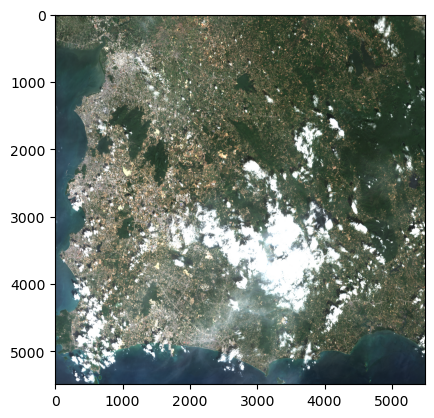

In [17]:
import rasterio
from matplotlib import pyplot
import numpy as np
with rasterio.open('Sentinel2_Data/47PQQ/2022-11-12/R20m/TCI.jp2') as f:
    img = f.read()
    img = np.transpose(img,[1,2,0])
    pyplot.imshow(img)

### Sanity Checking for cloud filtering

In [205]:
for data in clean_data:
    with rasterio.open(os.path.join(root_dir,data)+'/R20m/TCI.jp2') as f:
        img = f.read()
        img = np.transpose(img,[1,2,0])
        fig, ax1 = plt.subplots()
        ax1.imshow(img)

/tmp/ipykernel_4291/1339796719.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f02e5b4ad30> (for post_execute):


KeyboardInterrupt: 

# Create 10m Raster Geotiff file from jp2 (resample + stack)

In [11]:
import numpy as np
from osgeo import gdal
import glob
import os
from scipy.ndimage import zoom
import argparse
import rasterio
from rasterio.enums import Resampling

In [15]:
import shutil
root = '/home/jupyter/gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PRR'
sub_date = os.listdir(root)

In [213]:
sub_date = [date for date in sub_date if date.startswith('2020')]

In [214]:
sub_date

['2020-7-10',
 '2020-4-11',
 '2020-2-11',
 '2020-11-27',
 '2020-12-22',
 '2020-5-1',
 '2020-5-26',
 '2020-9-8',
 '2020-6-10',
 '2020-7-20',
 '2020-3-12',
 '2020-1-2',
 '2020-10-28',
 '2020-4-26',
 '2020-3-7',
 '2020-11-22',
 '2020-4-21',
 '2020-11-7',
 '2020-1-12',
 '2020-6-20',
 '2020-2-21',
 '2020-11-2',
 '2020-10-18',
 '2020-8-9',
 '2020-5-6',
 '2020-9-3',
 '2020-6-30',
 '2020-8-19',
 '2020-8-4',
 '2020-5-16',
 '2020-12-27',
 '2020-1-17',
 '2020-2-6',
 '2020-6-15',
 '2020-11-17',
 '2020-3-2',
 '2020-10-13',
 '2020-7-15',
 '2020-8-29',
 '2020-10-3',
 '2020-4-16',
 '2020-5-11',
 '2020-6-5',
 '2020-5-31',
 '2020-12-17',
 '2020-7-30',
 '2020-2-26',
 '2020-8-14',
 '2020-9-23',
 '2020-7-25',
 '2020-10-8',
 '2020-12-7',
 '2020-2-1',
 '2020-4-1',
 '2020-2-16',
 '2020-11-12',
 '2020-1-22',
 '2020-4-6',
 '2020-8-24',
 '2020-5-21',
 '2020-3-17',
 '2020-3-27',
 '2020-12-2',
 '2020-9-13',
 '2020-6-25',
 '2020-3-22',
 '2020-10-23',
 '2020-12-12',
 '2020-7-5',
 '2020-1-27',
 '2020-9-28',
 '2020-1-

In [138]:
for date in sub_date:
    try:
        shutil.rmtree(os.path.join(root,date))
    except:
        pass

In [18]:
def setGeo(geotransform,bgx,bgy,x_offset=0):
    if x_offset==0:
        x_offset = geotransform[1]
        y_offset = geotransform[5]
    else:
        x_offset = x_offset
        y_offset = -x_offset
    reset0 = geotransform[0] + bgx*geotransform[1]
    reset3 = geotransform[3] + bgy*geotransform[5]
    reset = (reset0,x_offset,geotransform[2],
             reset3,geotransform[4],y_offset)
    return reset


def sen20to10(fn,outdir=None):
    
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    im = gdal.Open(fn,gdal.GA_ReadOnly)
    projection = im.GetProjection()
    geotransform = im.GetGeoTransform()
    im = im.ReadAsArray()
    newgeo = setGeo(geotransform,0,0,x_offset=10)
    im = zoom(im,[2,2],order=0,mode='nearest')
    imx,imy = im.shape
    
    name = fn[-7:-4] + '_10m'
    #if outdir==None:
    #    name = wdir+'/'+name
    #else:
    name = outdir+'/'+name
    print(name)
    outdata = gdal.GetDriverByName('GTiff').Create(name+'.tif',imy,imx,1,gdal.GDT_UInt16)
    outdata.SetGeoTransform(newgeo)
    outdata.SetProjection(projection)
    outdata.GetRasterBand(1).WriteArray(im)
    outdata.FlushCache() ##saves to disk!!
    outdata = None
    
    
def read_save(fn,outdir=None):
    
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    im = gdal.Open(fn,gdal.GA_ReadOnly)
    projection = im.GetProjection()
    geotransform = im.GetGeoTransform()
    im = im.ReadAsArray()
    imx,imy = im.shape
    
    name = fn[-7:-4] + '_10m'
    #if outdir==None:
    #    name = wdir+'/'+name
    #else:
    name = outdir+'/'+name
    print(name)
    outdata = gdal.GetDriverByName('GTiff').Create(name+'.tif',imy,imx,1,gdal.GDT_UInt16)
    outdata.SetGeoTransform(geotransform)
    outdata.SetProjection(projection)
    outdata.GetRasterBand(1).WriteArray(im)
    outdata.FlushCache() ##saves to disk!!
    outdata = None

    
def readjp2single(fp,outdir=None):
    ls = ['10m/B02','10m/B03','10m/B04','10m/B08',
              '20m/B05','20m/B06','20m/B07','20m/B8A','20m/B11','20m/B12']
    for fn in glob.glob(fp+os.sep+'*'):
        #print(fn[-7:-4])
        
        if os.path.isdir(fn):
            readjp2single(fn,outdir=outdir)
        else:
            if fn[-11:-4] in ls:
                if '10m' in fn[-11:-4]:
                    #print(fn)
                    read_save(fn,outdir=outdir)
                elif '20m' in fn[-11:-4]:
                    #print(fn)
                    sen20to10(fn,outdir=outdir)
    return 0

def readjp2single_SCL(fp,outdir=None):
    ls = ['20m/SCL']
    for fn in glob.glob(fp+os.sep+'*'):
        #print(fn[-7:-4])
        
        if os.path.isdir(fn):
            readjp2single_SCL(fn,outdir=outdir)
        else:
            #print(fn[-11:-4])
            if fn[-11:-4] in ls:
                if '10m' in fn[-11:-4]:
                    read_save(fn,outdir=outdir)
                elif '20m' in fn[-11:-4]:
                    sen20to10(fn,outdir=outdir)
    return 0

def sen2cat(wdir,img='*.tif',name='concat',outdir=None):
    flist = glob.glob(wdir+'/'+img)
    imz = len(flist)
    count = 0
    
    if not os.path.exists(outdir):
        os.makedirs(outdir)
        
    name = outdir+'/'+name
        
    #os.chdir(outdir)
    print(sorted(flist))
    for fn in sorted(flist):
#        print(fn)
        im = gdal.Open(fn,gdal.GA_ReadOnly)
        projection = im.GetProjection()
        geotransform = im.GetGeoTransform()
        im = im.ReadAsArray()
        imx,imy = im.shape

        count += 1
        
        if count==1:
            outdata = gdal.GetDriverByName('GTiff').Create(name+'.tif',imy,imx,imz,gdal.GDT_UInt16)
            outdata.SetGeoTransform(geotransform)
            outdata.SetProjection(projection)
        outdata.GetRasterBand(count).WriteArray(im)
        outdata.FlushCache() ##saves to disk!!
    outdata = None

In [19]:
root_dir = '/home/jupyter/Sentinel2_Data/47PQQ'

In [20]:
for data in clean_data_filter:
    #print(os.path.join(root_dir,data))
    wdir = os.path.join(root_dir,data)
    geotiffdir = os.path.join(wdir,'R10m_GeoTiFF')
    outdir = os.path.join(wdir,'R10m_Concat')
    readjp2single(wdir,outdir= geotiffdir)
    sen2cat(wdir = geotiffdir,outdir = outdir ,name = data+'_S2ABands_stk')

/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B02_10m
/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B03_10m
/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B08_10m
/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B04_10m
/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B05_10m
/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B8A_10m
/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B11_10m
/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B12_10m
/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B07_10m
/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B06_10m
['/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B02_10m.tif', '/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B03_10m.tif', '/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B04_10m.tif', '/home/jupyter/Sentinel2_Data/47PQQ/2020-11-17/R10m_GeoTiFF/B05_10m.tif', '/home/jupyter/Sentinel2_Data/47P

In [216]:
for data in clean_data:
    #print(os.path.join(root_dir,data))
    wdir = os.path.join(root_dir,data)
    geotiffdir = os.path.join(wdir,'R10m_GeoTiFF')
    outdir = os.path.join(wdir,'R10m_Concat')
    readjp2single(wdir,outdir= geotiffdir)
    sen2cat(wdir = geotiffdir,outdir = outdir ,name = data+'_10m_AllBands')

Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B02_10m
Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B03_10m
Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B08_10m
Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B04_10m
Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B05_10m
Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B8A_10m
Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B11_10m
Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B12_10m
Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B07_10m
Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B06_10m
['Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B02_10m.tif', 'Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B03_10m.tif', 'Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B04_10m.tif', 'Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B05_10m.tif', 'Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B06_10m.tif', 'Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B07_10m.tif', 'Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B08_10m.tif', 'Sentinel2_Data/47PQQ/2020-1-12/R10m_GeoTiFF/B11_10m.tif', 'Sentin

In [70]:
for data in clean_data:
    #print(os.path.join(root_dir,data))
    wdir = os.path.join(root_dir,data)
    geotiffdir = os.path.join(wdir,'R10m_SCL_GeoTiFF')
    readjp2single_SCL(wdir,outdir= geotiffdir)

gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-1-12/R10m_SCL_GeoTiFF/SCL_10m
gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-1-17/R10m_SCL_GeoTiFF/SCL_10m
gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-1-2/R10m_SCL_GeoTiFF/SCL_10m
gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-1-22/R10m_SCL_GeoTiFF/SCL_10m
gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-1-27/R10m_SCL_GeoTiFF/SCL_10m
gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-1-7/R10m_SCL_GeoTiFF/SCL_10m
gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-10-23/R10m_SCL_GeoTiFF/SCL_10m
gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-11-17/R10m_SCL_GeoTiFF/SCL_10m
gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-11-2/R10m_SCL_GeoTiFF/SCL_10m
gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ/2020-11-22/R10m_SCL_GeoTiFF/SCL_10m
gcs/biomass-estimation-projec

In [94]:
clean_data

['2022-1-1',
 '2022-1-11',
 '2022-1-16',
 '2022-1-21',
 '2022-1-26',
 '2022-1-31',
 '2022-1-6',
 '2022-10-13',
 '2022-10-18',
 '2022-10-23',
 '2022-10-8',
 '2022-11-12',
 '2022-11-2',
 '2022-11-7',
 '2022-2-20',
 '2022-2-25',
 '2022-2-5',
 '2022-3-12',
 '2022-3-17',
 '2022-3-2',
 '2022-3-22',
 '2022-3-27',
 '2022-3-7',
 '2022-4-1',
 '2022-4-11',
 '2022-4-16',
 '2022-4-21',
 '2022-4-26',
 '2022-4-6',
 '2022-5-31',
 '2022-6-10',
 '2022-6-15',
 '2022-6-20',
 '2022-6-25',
 '2022-6-30',
 '2022-6-5',
 '2022-7-25',
 '2022-7-30',
 '2022-8-14',
 '2022-8-19',
 '2022-8-24',
 '2022-8-29',
 '2022-8-4',
 '2022-9-13',
 '2022-9-3']

# Match Sentinel 2 Data with correct GEDI date 

In [132]:
import os
import pandas as pd
import re

In [133]:
sentinel2_clean_data = clean_data

In [134]:
sentinel2_clean_data

['2022-1-1',
 '2022-1-11',
 '2022-1-16',
 '2022-1-21',
 '2022-1-26',
 '2022-1-31',
 '2022-1-6',
 '2022-10-13',
 '2022-10-18',
 '2022-10-23',
 '2022-10-8',
 '2022-11-12',
 '2022-11-2',
 '2022-11-7',
 '2022-2-20',
 '2022-2-25',
 '2022-2-5',
 '2022-3-12',
 '2022-3-17',
 '2022-3-2',
 '2022-3-22',
 '2022-3-27',
 '2022-3-7',
 '2022-4-1',
 '2022-4-11',
 '2022-4-16',
 '2022-4-21',
 '2022-4-26',
 '2022-4-6',
 '2022-5-31',
 '2022-6-10',
 '2022-6-15',
 '2022-6-20',
 '2022-6-25',
 '2022-6-30',
 '2022-6-5',
 '2022-7-25',
 '2022-7-30',
 '2022-8-14',
 '2022-8-19',
 '2022-8-24',
 '2022-8-29',
 '2022-8-4',
 '2022-9-13',
 '2022-9-3']

## Note : At this time there is 6 month GEDI data Available (17/11/2022)

In [135]:
sentinel2_clean_data = [ date for date in sentinel2_clean_data if int(date.split('-')[1]) <= 6] # only first half of the year

In [136]:
sentinel2_clean_data

['2022-1-1',
 '2022-1-11',
 '2022-1-16',
 '2022-1-21',
 '2022-1-26',
 '2022-1-31',
 '2022-1-6',
 '2022-2-20',
 '2022-2-25',
 '2022-2-5',
 '2022-3-12',
 '2022-3-17',
 '2022-3-2',
 '2022-3-22',
 '2022-3-27',
 '2022-3-7',
 '2022-4-1',
 '2022-4-11',
 '2022-4-16',
 '2022-4-21',
 '2022-4-26',
 '2022-4-6',
 '2022-5-31',
 '2022-6-10',
 '2022-6-15',
 '2022-6-20',
 '2022-6-25',
 '2022-6-30',
 '2022-6-5']

In [137]:
#GEDI_L2A_root = 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002' ## Folder contain .h5 raw canopy top heigth store in date format YYYY.MM.DD
GEDI_L2A_root = 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002' ## Folder contain .h5 raw canopy top heigth store in date format YYYY.MM.DD

In [138]:
GEDI_date_available = os.listdir(GEDI_L2A_root)

In [139]:
GEDI_data_path = [os.path.join(GEDI_L2A_root,date) for date in GEDI_date_available]

In [140]:
GEDI_date_available = [date.split('.') for date in  GEDI_date_available]

In [141]:
for i, datearr in enumerate(GEDI_date_available):
    #print(datearr)
    datearr = [num.replace('0','') if num.startswith('0') else num for num in datearr ]
    GEDI_date_available[i] = datearr

In [142]:
GEDI_date_available = ['-'.join(date) for date in  GEDI_date_available]

In [143]:
GEDI_date_available # same formate as sentinel 2 day

['2019-4-18',
 '2019-4-25',
 '2019-5-20',
 '2019-5-26',
 '2019-5-31',
 '2019-6-6',
 '2019-6-11',
 '2019-6-25',
 '2019-7-2',
 '2019-7-6',
 '2019-7-16',
 '2019-8-5',
 '2019-8-11',
 '2019-8-16',
 '2019-8-30',
 '2019-9-3',
 '2020-1-9',
 '2020-1-13',
 '2020-1-22',
 '2020-1-26',
 '2020-1-30',
 '2020-2-3',
 '2020-2-7',
 '2020-2-11',
 '2020-2-14',
 '2020-2-22',
 '2020-2-26',
 '2020-3-1',
 '2020-3-5',
 '2020-3-13',
 '2020-3-17',
 '2020-3-21',
 '2020-3-25',
 '2020-3-29',
 '2020-4-2',
 '2020-4-6',
 '2020-4-21',
 '2020-4-29',
 '2020-5-3',
 '2020-5-7',
 '2020-5-15',
 '2020-5-19',
 '2020-5-23',
 '2020-5-27',
 '2020-6-30',
 '2020-7-4',
 '2020-7-8',
 '2020-7-11',
 '2020-7-15',
 '2020-7-19',
 '2020-7-28',
 '2020-8-1',
 '2020-8-5',
 '2020-8-9',
 '2020-8-13',
 '2020-8-16',
 '2020-8-20',
 '2020-8-24',
 '2020-8-28',
 '2020-9-1',
 '2020-9-5',
 '2020-9-9',
 '2020-9-13',
 '2020-9-17',
 '2020-9-21',
 '2020-9-25',
 '2020-10-2',
 '2020-10-6',
 '2020-10-10',
 '2020-10-18',
 '2020-10-22',
 '2020-10-26',
 '2020-10-

In [149]:
GEDI_metadata = pd.DataFrame({'Date':GEDI_date_available,'Year':[date.split('-')[0]for date in GEDI_date_available],'Month':[date.split('-')[1]for date in GEDI_date_available],'Day':[date.split('-')[2]for date in GEDI_date_available],'Path':GEDI_data_path})

In [150]:
GEDI_metadata = GEDI_metadata.sort_values('Date')

In [151]:
GEDI_metadata.reset_index(drop = True , inplace = True)

In [152]:
GEDI_metadata

,Date,Year,Month,Day,Path
0,2019-4-18,2019,4,18,gcs/biomass-estimation-project/vm-backup/GEDI_...
1,2019-4-25,2019,4,25,gcs/biomass-estimation-project/vm-backup/GEDI_...
2,2019-5-20,2019,5,20,gcs/biomass-estimation-project/vm-backup/GEDI_...
3,2019-5-26,2019,5,26,gcs/biomass-estimation-project/vm-backup/GEDI_...
4,2019-5-31,2019,5,31,gcs/biomass-estimation-project/vm-backup/GEDI_...
...,...,...,...,...,...
105,2022-4-4,2022,4,4,gcs/biomass-estimation-project/vm-backup/GEDI_...
106,2022-5-26,2022,5,26,gcs/biomass-estimation-project/vm-backup/GEDI_...
107,2022-5-30,2022,5,30,gcs/biomass-estimation-project/vm-backup/GEDI_...
108,2022-5-4,2022,5,4,gcs/biomass-estimation-project/vm-backup/GEDI_...


In [153]:
match_GEDI_path = []
match_GEDI_date = []
for senteinel_2_clean_date in sentinel2_clean_data:
    # format YYYY-MM-DD
    year = senteinel_2_clean_date.split('-')[0]
    month = senteinel_2_clean_date.split('-')[1]
    day = senteinel_2_clean_date.split('-')[2]
    
    year_contain = GEDI_metadata.loc[GEDI_metadata['Year'] == year]
    month_contain = year_contain.loc[year_contain['Month'] == month]
    day_availabe = month_contain['Day'].tolist()
    day_availabe = [int(date) for date in day_availabe]
    closet_day = min(day_availabe, key=lambda x:abs(x-int(day)))
    match_date = month_contain.loc[month_contain['Day'] == str(closet_day)]
    day_match = match_date['Date'].tolist()[0]
    print(f'Sentinel 2 {senteinel_2_clean_date} : GEDI {day_match}')
    match_GEDI_path.append(match_date['Path'].tolist()[0])
    match_GEDI_date.append(match_date['Date'].tolist()[0])

Sentinel 2 2022-1-1 : GEDI 2022-1-1
Sentinel 2 2022-1-11 : GEDI 2022-1-19
Sentinel 2 2022-1-16 : GEDI 2022-1-19
Sentinel 2 2022-1-21 : GEDI 2022-1-19
Sentinel 2 2022-1-26 : GEDI 2022-1-27
Sentinel 2 2022-1-31 : GEDI 2022-1-31
Sentinel 2 2022-1-6 : GEDI 2022-1-1
Sentinel 2 2022-2-20 : GEDI 2022-2-27
Sentinel 2 2022-2-25 : GEDI 2022-2-27
Sentinel 2 2022-2-5 : GEDI 2022-2-5
Sentinel 2 2022-3-12 : GEDI 2022-3-14
Sentinel 2 2022-3-17 : GEDI 2022-3-14
Sentinel 2 2022-3-2 : GEDI 2022-3-3
Sentinel 2 2022-3-22 : GEDI 2022-3-23
Sentinel 2 2022-3-27 : GEDI 2022-3-27
Sentinel 2 2022-3-7 : GEDI 2022-3-7
Sentinel 2 2022-4-1 : GEDI 2022-4-4
Sentinel 2 2022-4-11 : GEDI 2022-4-18
Sentinel 2 2022-4-16 : GEDI 2022-4-18
Sentinel 2 2022-4-21 : GEDI 2022-4-22
Sentinel 2 2022-4-26 : GEDI 2022-4-26
Sentinel 2 2022-4-6 : GEDI 2022-4-4
Sentinel 2 2022-5-31 : GEDI 2022-5-30
Sentinel 2 2022-6-10 : GEDI 2022-6-4
Sentinel 2 2022-6-15 : GEDI 2022-6-4
Sentinel 2 2022-6-20 : GEDI 2022-6-4
Sentinel 2 2022-6-25 : GEDI 2

In [154]:
dataset_metadata = pd.DataFrame({'Sentinel_2_Date:':sentinel2_clean_data ,'GEDI_Date' :match_GEDI_date , 'GEDI_Path':match_GEDI_path})

In [155]:
GEDIpath = dataset_metadata['GEDI_Path'].tolist()
fullpath = [os.path.join(path, os.listdir(path)[0]) for path in GEDIpath]
fullpath

['gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.01/GEDI02_A_2022001160539_O17304_02_T02455_02_003_02_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.19/GEDI02_A_2022019185846_O17585_03_T09148_02_003_02_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.19/GEDI02_A_2022019185846_O17585_03_T09148_02_003_02_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.19/GEDI02_A_2022019185846_O17585_03_T09148_02_003_02_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.27/GEDI02_A_2022027154822_O17707_03_T09760_02_003_02_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.31/GEDI02_A_2022031141251_O17768_03_T08643_02_003_02_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.01/GEDI02_A_2022001160539_O17304_0

In [156]:
dataset_metadata['GEDI_Path'] = fullpath

In [157]:
dataset_metadata

,Sentinel_2_Date:,GEDI_Date,GEDI_Path
0,2022-1-1,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...
1,2022-1-11,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...
2,2022-1-16,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...
3,2022-1-21,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...
4,2022-1-26,2022-1-27,gcs/biomass-estimation-project/vm-backup/GEDI_...
5,2022-1-31,2022-1-31,gcs/biomass-estimation-project/vm-backup/GEDI_...
6,2022-1-6,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...
7,2022-2-20,2022-2-27,gcs/biomass-estimation-project/vm-backup/GEDI_...
8,2022-2-25,2022-2-27,gcs/biomass-estimation-project/vm-backup/GEDI_...
9,2022-2-5,2022-2-5,gcs/biomass-estimation-project/vm-backup/GEDI_...


In [26]:
dataset_metadata.to_csv('dataset/Sentinel2Canopy_dataset2022_metadata.csv',index=False)

# Pre-Process GEDI Data 

In [158]:
import os
import h5py
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from tqdm import tqdm
#import geoviews as gv
#from geoviews import opts, tile_sources as gvts
#import holoviews as hv
#gv.extension('bokeh', 'matplotlib')

In [159]:
dataset_metadata = pd.read_csv('dataset/Sentinel2Canopy_dataset2022_metadata.csv')

In [160]:
data_list = dataset_metadata['GEDI_Path'].tolist()

In [161]:
data_list

['gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.01/GEDI02_A_2022001160539_O17304_02_T02455_02_003_02_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.19/GEDI02_A_2022019185846_O17585_03_T09148_02_003_02_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.19/GEDI02_A_2022019185846_O17585_03_T09148_02_003_02_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.19/GEDI02_A_2022019185846_O17585_03_T09148_02_003_02_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.27/GEDI02_A_2022027154822_O17707_03_T09760_02_003_02_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.31/GEDI02_A_2022031141251_O17768_03_T08643_02_003_02_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.01/GEDI02_A_2022001160539_O17304_0

In [162]:
data_list = ['/home/jupyter/'+ data for data in data_list]

In [163]:
data_list

['/home/jupyter/gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.01/GEDI02_A_2022001160539_O17304_02_T02455_02_003_02_V002.h5',
 '/home/jupyter/gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.19/GEDI02_A_2022019185846_O17585_03_T09148_02_003_02_V002.h5',
 '/home/jupyter/gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.19/GEDI02_A_2022019185846_O17585_03_T09148_02_003_02_V002.h5',
 '/home/jupyter/gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.19/GEDI02_A_2022019185846_O17585_03_T09148_02_003_02_V002.h5',
 '/home/jupyter/gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.27/GEDI02_A_2022027154822_O17707_03_T09760_02_003_02_V002.h5',
 '/home/jupyter/gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2022.01.31/GEDI02_A_2022031141251_O17768_03_T08643_02_003_02_V002.h5',
 '/home/jupyter/gcs/biomass-estima

In [13]:
for data in data_list:
    try:
        print(data.split('/')[-2])
        gediL2A = h5py.File(data, 'r')  # Read file using h5py
        beamNames = ['BEAM0110']
        gediL2A_objs = []
        gediL2A.visit(gediL2A_objs.append)                                           # Retrieve list of datasets
        gediSDS = [o for o in gediL2A_objs if isinstance(gediL2A[o], h5py.Dataset)]  # Search for relevant SDS inside data file
        rayong = gp.GeoDataFrame.from_file('GEDI-v2-Tutorial_L2/boundary_47PQQ_latlon.geojson')  # Import GeoJSON as GeoDataFrame
        beamNames = [g for g in gediL2A.keys() if g.startswith('BEAM')]
        # Set up lists to store data
        shotNum, dem, zElevation, zHigh, zLat, zLon, rh25, rh98, rh100 ,quality ,degrade, sensitivity ,beamI = ([] for i in range(13))  
        # Loop through each beam and open the SDS needed
        for b in beamNames:
            [shotNum.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()]]
            [dem.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/digital_elevation_model') and b in g][0]][()]]
            [zElevation.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/elev_lowestmode') and b in g][0]][()]]  
            [zHigh.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/elev_highestreturn') and b in g][0]][()]]  
            [zLat.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/lat_lowestmode') and b in g][0]][()]]  
            [zLon.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/lon_lowestmode') and b in g][0]][()]]  
            [rh25.append(h[25]) for h in gediL2A[[g for g in gediSDS if g.endswith('/rh') and b in g][0]][()]]  
            [rh98.append(h[98]) for h in gediL2A[[g for g in gediSDS if g.endswith('/rh') and b in g][0]][()]]
            [rh100.append(h[100]) for h in gediL2A[[g for g in gediSDS if g.endswith('/rh') and b in g][0]][()]]  
            [quality.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/quality_flag') and b in g][0]][()]]  
            [degrade.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/degrade_flag') and b in g][0]][()]]  
            [sensitivity.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/sensitivity') and b in g][0]][()]]  
            [beamI.append(h) for h in [b] * len(gediL2A[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()])]  
        # Convert lists to Pandas dataframe
        allDF = pd.DataFrame({'Shot Number': shotNum, 'Beam': beamI, 'Latitude': zLat, 'Longitude': zLon, 'Tandem-X DEM': dem,
                              'Elevation (m)': zElevation, 'Canopy Elevation (m)': zHigh, 'Canopy Height (rh100)': rh100, 'RH 98': rh98,
                              'RH 25': rh25, 'Quality Flag': quality, 'Degrade Flag': degrade, 'Sensitivity': sensitivity})
        del beamI, degrade, dem, gediSDS, rh100, rh98, rh25, quality, sensitivity, zElevation, zHigh, zLat, zLon, shotNum
        minLon, minLat, maxLon, maxLat = rayong.envelope[0].bounds  # Define the min/max lat/lon from the bounds
        allDF = allDF.where(allDF['Latitude'] > minLat)
        allDF = allDF.where(allDF['Latitude'] < maxLat)
        allDF = allDF.where(allDF['Longitude'] > minLon)
        allDF = allDF.where(allDF['Longitude'] < maxLon)
        allDF = allDF.dropna()  # Drop shots outside of the ROI
        # Set any poor quality returns to NaN
        allDF = allDF.where(allDF['Quality Flag'].ne(0))
        allDF = allDF.where(allDF['Degrade Flag'] < 1) 
        allDF = allDF.where(allDF['Sensitivity'] > 0.95)
        allDF = allDF.dropna()
        # Take the lat/lon dataframe and convert each lat/lon to a shapely point
        allDF['geometry'] = allDF.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
        # Convert to geodataframe
        allDF = gp.GeoDataFrame(allDF)
        allDF = allDF.drop(columns=['Latitude','Longitude'])
        outName = data.split('/')[-2]+'_'+data.split('/')[-1].replace('.h5','.json')  # Create an output file name using the input file name
        outputdir = 'dataset/GEDI_Cleandata_raw_2022'
        if not os.path.exists(outputdir):
            os.makedirs(outputdir)
        allDF.to_file(os.path.join(outputdir,outName), driver='GeoJSON')  # Export to GeoJSON
    except:
        pass

2022.01.01
2022.01.19
2022.01.19
2022.01.19
2022.01.27
2022.01.31
2022.01.01
2022.02.27
2022.02.27
2022.02.05
2022.03.14
2022.03.14
2022.03.03
2022.03.23
2022.03.27
2022.03.07
2022.04.04
2022.04.18
2022.04.18
2022.04.22
2022.04.26
2022.04.04
2022.05.30
2022.06.04
2022.06.04
2022.06.04
2022.06.04
2022.06.04
2022.06.04


In [48]:
dataset_metadata['GEDI_Path'].tolist()

['gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2020.01.13/GEDI02_A_2020013221908_O06163_03_T02951_02_003_01_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2020.01.13/GEDI02_A_2020013221908_O06163_03_T02951_02_003_01_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2020.01.09/GEDI02_A_2020009235408_O06102_03_T04221_02_003_01_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2020.01.22/GEDI02_A_2020022090447_O06294_02_T00267_02_003_01_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2020.01.26/GEDI02_A_2020026073052_O06355_02_T04689_02_003_01_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2020.01.09/GEDI02_A_2020009235408_O06102_03_T04221_02_003_01_V002.h5',
 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/EDI02_A.002/2020.10.22/GEDI02_A_2020296203216_O10549_0

In [33]:
root_targetdata = 'gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/L2A_SUBSET_TARGET_DATE'
listfile = os.listdir(root_targetdata)
for row in range(len(dataset_metadata)):
    date = dataset_metadata.loc[row,'GEDI_Path'].split('/')[6]
    for file_ in listfile:
        if date in file_:
            dataset_metadata.loc[row,'GEDI_Path_target_JSON'] = os.path.join(root_targetdata,file_)

In [34]:
dataset_metadata

,Sentinel_2_Date:,GEDI_Date,GEDI_Path,GEDI_Path_target_JSON
0,2022-1-1,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
1,2022-1-11,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
2,2022-1-16,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
3,2022-1-21,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
4,2022-1-26,2022-1-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
5,2022-1-31,2022-1-31,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
6,2022-1-6,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
7,2022-2-20,2022-2-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
8,2022-2-25,2022-2-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
9,2022-2-5,2022-2-5,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...


In [35]:
dataset_metadata.dropna(inplace=True)

In [36]:
dataset_metadata.reset_index(inplace=True)

In [37]:
dataset_metadata

,index,Sentinel_2_Date:,GEDI_Date,GEDI_Path,GEDI_Path_target_JSON
0,0,2022-1-1,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
1,1,2022-1-11,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
2,2,2022-1-16,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
3,3,2022-1-21,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
4,4,2022-1-26,2022-1-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
5,5,2022-1-31,2022-1-31,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
6,6,2022-1-6,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
7,7,2022-2-20,2022-2-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
8,8,2022-2-25,2022-2-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...
9,9,2022-2-5,2022-2-5,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...


# Drop data with 0 GEDI point

In [38]:
num_point = []
for row in range(len(dataset_metadata)):
    vector = gpd.GeoDataFrame.from_file(dataset_metadata.loc[row,'GEDI_Path_target_JSON'])
    num_point.append(len(vector))

In [39]:
dataset_metadata['Num_point'] = num_point

In [40]:
dataset_metadata

,index,Sentinel_2_Date:,GEDI_Date,GEDI_Path,GEDI_Path_target_JSON,Num_point
0,0,2022-1-1,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,233
1,1,2022-1-11,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2
2,2,2022-1-16,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2
3,3,2022-1-21,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2
4,4,2022-1-26,2022-1-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,6734
5,5,2022-1-31,2022-1-31,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,5101
6,6,2022-1-6,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,233
7,7,2022-2-20,2022-2-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,0
8,8,2022-2-25,2022-2-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,0
9,9,2022-2-5,2022-2-5,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,3104


In [41]:
dataset_metadata = dataset_metadata[dataset_metadata['Num_point']!= 0]

In [42]:
dataset_metadata.reset_index(inplace = True , drop = True)

In [44]:
dataset_metadata = dataset_metadata.drop(['index'], axis=1)

In [43]:
dataset_metadata = dataset_metadata.drop(['level_0','index'], axis=1)

KeyError: "['level_0'] not found in axis"

In [122]:
dataset_metadata

,Sentinel_2_Date:,GEDI_Date,GEDI_Path,GEDI_Path_target_JSON,Num_point,GEDI_Path_target_JSON_Clean
0,2022-1-1,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,233,gcs/biomass-estimation-project/vm-backup/GEDI_...
1,2022-1-11,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2,gcs/biomass-estimation-project/vm-backup/GEDI_...
2,2022-1-16,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2,gcs/biomass-estimation-project/vm-backup/GEDI_...
3,2022-1-21,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2,gcs/biomass-estimation-project/vm-backup/GEDI_...
4,2022-1-26,2022-1-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,6734,gcs/biomass-estimation-project/vm-backup/GEDI_...
5,2022-1-31,2022-1-31,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,5101,gcs/biomass-estimation-project/vm-backup/GEDI_...
6,2022-1-6,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,233,gcs/biomass-estimation-project/vm-backup/GEDI_...
7,2022-2-5,2022-2-5,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,3104,gcs/biomass-estimation-project/vm-backup/GEDI_...
8,2022-3-12,2022-3-14,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,9123,gcs/biomass-estimation-project/vm-backup/GEDI_...
9,2022-3-17,2022-3-14,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,9123,gcs/biomass-estimation-project/vm-backup/GEDI_...


### Relabel GEDI Data
a.Tune beam sensitivity → More data available (now 0.95, try lower sensitivity)

b. Change RH parameters → Reduce over-estimation issue (now RH = 100, lower RH → lower height)

c. Data Cleansing, Must with following conditions

Height < 3m

Tree canopy cover < 50 (from Landsat Tree Canopy data)

SCL → Water

Urban classification map(from GHSL dataset)

Max annual NDVI < 0.3

In [127]:
# Read canopy cover data
canopy_cover_2000 = rasterio.open('dataset/Canopy_Cover/Canopy_cover_2000_47PQQ_30m_align.tif')
canopy_cover_2010 = rasterio.open('dataset/Canopy_Cover/Canopy_cover_2010_47PQQ_30m_align.tif')

# ESA Classification Data read
ESA_cls = rasterio.open('dataset/47PQQ_ESA_classification_30m_align.tif')

# 2022 NDVI annual maximum composite data read 
max_ndvi = rasterio.open('dataset/Composite_NDVI_Data/GEO_47PQQ_2022_NDVI_30m_32647_align.tif')

# SRTM Elvation data
srtm = rasterio.open('dataset/SRTM/SRTM_47PQQ_32647_30m_align_filled.tif')

# SRTM Slope data 
srtm_slope = rasterio.open('dataset/SRTM/SRTM_SLOPE_Degree_47PQQ_32647_30m_align_filled.tif')

In [165]:
for row in tqdm(range(len(dataset_metadata))):
    date = dataset_metadata.loc[row,'GEDI_Date']
    
    # Read in vector
    gedi_data = gpd.GeoDataFrame.from_file(dataset_metadata.loc[row,'GEDI_Path_target_JSON'])
    gedi_data = gedi_data.to_crs(32647)
    
    #### Change RH parameters → Reduce over-estimation issue (Use RH 95)
    ### Assign Canopy height to RH 95
    gedi_data['Canopy_height'] = gedi_data['RH 95']
    gedi_data.to_crs(32647)
    

    ### Get Coordinate of GEDI
    coord_list = [(x,y) for x,y in zip(gedi_data['geometry'].x , gedi_data['geometry'].y)]
    
    ### Get Canopy cover data
    gedi_data['TreeCov2000'] = [x[0] for x in canopy_cover_2000.sample(coord_list)]
    gedi_data['TreeCov2010'] = [x[0] for x in canopy_cover_2010.sample(coord_list)]
    
    ## Get ESA Classification data
    gedi_data['ESA_CLS'] = [x[0] for x in ESA_cls.sample(coord_list)]
    
    ## Get Maximun anuual NDVI  data
    gedi_data['NDVI_Max'] = [x[0] for x in max_ndvi.sample(coord_list)]
    ndvimax = gedi_data['NDVI_Max'].tolist()
    ## get NDVI outlier
    outlier = [1 if (ndvi == -9999) or (ndvi > 10000) else 0 for ndvi in ndvimax]
    gedi_data['Outlier'] = outlier
    gedi_data['NDVI_Max'] = gedi_data['NDVI_Max']/10000
    
    ## Get SRTM  data
    gedi_data['SRTM'] = [x[0] for x in srtm.sample(coord_list)]
    
    ## Get SRTM slope  data
    gedi_data['SRTM_slope'] = [x[0] for x in srtm_slope.sample(coord_list)]
    
    ## SCL Data read
    ## one gedi data may use many sentinel 2 data
    if 'SCL' in gedi_data.columns:
        pass
    else:
        sentinel2_date = dataset_metadata.loc[row,'Sentinel_2_Date:']
        #sentinel2_raster_SCL_dir = os.path.join(os.path.join('gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ',sentinel2_date),'R30m_SCL_GeoTiFF')
        sentinel2_raster_SCL_dir = os.path.join(os.path.join('Sentinel2_Data/47PQQ',sentinel2_date),'R30m_SCL_GeoTiFF')
        filename_SCL = 'SCL_30m.tif'
        sentinel2_raster_SCL_path = os.path.join(sentinel2_raster_SCL_dir,filename_SCL)
        with rasterio.open(sentinel2_raster_SCL_path) as scl:
            gedi_data['SCL'] = [x[0] for x in scl.sample(coord_list)]
            
    #### Assign GEDI Sample SRTM > 80 to use RH 75
    gedi_data.loc[(gedi_data['SRTM'] >= 80),'Canopy_height']  = gedi_data['RH 75']
    
    #### Assign GEDI Sample with RH95 < 3 m to Zero
    gedi_data.loc[(gedi_data['Canopy_height'] <= 3) ,'Canopy_height'] = 0.0
    
    # if no tree cover in both 2000 , 2010: set value to zero if match one of following citeria:
    # 1.Pixel is classify as water (Sentinel2 - SCL == 6)
    gedi_data.loc[(gedi_data['TreeCov2000'] < 50) & (gedi_data['TreeCov2010'] < 50) & (gedi_data['SCL'] == 6) , 'Canopy_height'] = 0
    
    # 2. Pixel locate in urban area and Maximum annual NDVI below 0.5
    # 50 Built up
    gedi_data.loc[(gedi_data['TreeCov2000'] < 50) & (gedi_data['TreeCov2010'] < 50) & (gedi_data['ESA_CLS'] == 50) & (gedi_data['NDVI_Max'] < 0.5) , 'Canopy_height'] = 0.0
    # 60 Sparse Vegetation
    gedi_data.loc[(gedi_data['TreeCov2000'] < 50) & (gedi_data['TreeCov2010'] < 50) & (gedi_data['ESA_CLS'] == 60) & (gedi_data['NDVI_Max'] < 0.5) , 'Canopy_height'] = 0.0
    # 40 Crop land
    gedi_data.loc[(gedi_data['TreeCov2000'] < 50) & (gedi_data['TreeCov2010'] < 50) & (gedi_data['ESA_CLS'] == 40) & (gedi_data['NDVI_Max'] < 0.5) , 'Canopy_height'] = 0.0
    # 30 Grass land
    gedi_data.loc[(gedi_data['TreeCov2000'] < 50) & (gedi_data['TreeCov2010'] < 50) & (gedi_data['ESA_CLS'] == 30) & (gedi_data['NDVI_Max'] < 0.5) , 'Canopy_height'] = 0.0
    # 20 Shrub land
    gedi_data.loc[(gedi_data['TreeCov2000'] < 50) & (gedi_data['TreeCov2010'] < 50) & (gedi_data['ESA_CLS'] == 20) & (gedi_data['NDVI_Max'] < 0.5) , 'Canopy_height'] = 0.0
    
    # 3.SRTM elevation above 1500m and slove above 6 degree
    gedi_data.loc[(gedi_data['TreeCov2000'] < 50) & (gedi_data['TreeCov2010'] < 50) & (gedi_data['SRTM'] > 1500) & (gedi_data['SRTM_slope'] > 6) , 'Canopy_height'] = 0.0
    
    # 4.Maximum annual NDVI below 0.3
    gedi_data.loc[(gedi_data['TreeCov2000'] < 50) & (gedi_data['TreeCov2010'] < 50) & (gedi_data['NDVI_Max'] < 0.3) , 'Canopy_height'] = 0.0
    
    # 4.NDVI out of range
    gedi_data.loc[(gedi_data['TreeCov2000'] < 50) & (gedi_data['TreeCov2010'] < 50) & (gedi_data['Outlier'] == 1) , 'Canopy_height'] = 0.0
    
    # Or Tree cover is identify as Water Cloud Shadow (> 200)
        # 1.Pixel is classify as water (Sentinel2 - SCL == 6)
    gedi_data.loc[(gedi_data['TreeCov2000'] > 200) & (gedi_data['TreeCov2010'] > 200) & (gedi_data['SCL'] == 6) , 'Canopy_height'] = 0
    
    # 2. Pixel locate in urban area and Maximum annual NDVI below 0.5
    # 50 Built up
    gedi_data.loc[(gedi_data['TreeCov2000'] > 200) & (gedi_data['TreeCov2010'] > 200) & (gedi_data['ESA_CLS'] == 50) & (gedi_data['NDVI_Max'] < 0.5) , 'Canopy_height'] = 0.0
    # 60 Sparse Vegetation
    gedi_data.loc[(gedi_data['TreeCov2000'] > 200) & (gedi_data['TreeCov2010'] > 200) & (gedi_data['ESA_CLS'] == 60) & (gedi_data['NDVI_Max'] < 0.5) , 'Canopy_height'] = 0.0
    # 40 Crop land
    gedi_data.loc[(gedi_data['TreeCov2000'] > 200) & (gedi_data['TreeCov2010'] > 200) & (gedi_data['ESA_CLS'] == 40) & (gedi_data['NDVI_Max'] < 0.5) , 'Canopy_height'] = 0.0
    # 30 Grass land
    gedi_data.loc[(gedi_data['TreeCov2000'] > 200) & (gedi_data['TreeCov2010'] > 200) & (gedi_data['ESA_CLS'] == 30) & (gedi_data['NDVI_Max'] < 0.5) , 'Canopy_height'] = 0.0
    # 20 Shrub land
    gedi_data.loc[(gedi_data['TreeCov2000'] > 200) & (gedi_data['TreeCov2010'] > 200) & (gedi_data['ESA_CLS'] == 20) & (gedi_data['NDVI_Max'] < 0.5) , 'Canopy_height'] = 0.0
    
    # 3.SRTM elevation above 1500m and slove above 6 degree
    gedi_data.loc[(gedi_data['TreeCov2000'] > 200) & (gedi_data['TreeCov2010'] > 200) & (gedi_data['SRTM'] > 1500) & (gedi_data['SRTM_slope'] > 6) , 'Canopy_height'] = 0.0
    
    # 4.Maximum annual NDVI below 0.3
    gedi_data.loc[(gedi_data['TreeCov2000'] > 200) & (gedi_data['TreeCov2010'] > 200) & (gedi_data['NDVI_Max'] < 0.3) , 'Canopy_height'] = 0.0
    
    # 4.NDVI out of range
    gedi_data.loc[(gedi_data['TreeCov2000'] > 200) & (gedi_data['TreeCov2010'] > 200) & (gedi_data['Outlier'] == 1) , 'Canopy_height'] = 0.0
    
    ## save file
    outName = dataset_metadata.loc[row,'GEDI_Path_target_JSON'].replace('.json','_filter') + '.json'
    dataset_metadata.loc[row,'GEDI_Path_target_JSON_Clean'] = outName
    gedi_data.to_file(outName, driver='GeoJSON')

100%|██████████| 15/15 [00:49<00:00,  3.28s/it]


In [166]:
canopy_cover_2000.close()
canopy_cover_2010.close()
ESA_cls.close()
max_ndvi.close()
srtm.close()
srtm_slope.close()

In [167]:
dataset_metadata.to_csv('dataset/Sentinel2Canopy_dataset2022_metadata_RH75_95.csv',index=False)

# Create Dataset

In [168]:
#MODULE NAME
import os                               #data access to file manager
import matplotlib.pyplot as plt         #create visualizations
import matplotlib as mpl                #create visualizations
import pandas as pd                     #data analysis and manipulation
import numpy as np                      #scientific computing
import subprocess                       #allows you to spawn new processes
import rasterio as rio                  #working with geospatial raster data
from osgeo import gdal, gdal_array, ogr #import major modules from gdal library
import geopandas as gpd                 #extention of databases used in pandas to allow spatial operations
from rasterio.crs import CRS
from patchify import patchify, unpatchify

## Get metadata

In [13]:
gt_filepath = 'Sentinel2_Data/47PQQ/2022-1-1/R10m_Concat/2022-1-1_10m_AllBands.tif'

with rasterio.open(gt_filepath) as dataset:
    # what is the name of this image
    img_name = dataset.name
    print('Image filename: {n}\n'.format(n=img_name))

    # How many bands does this image have?
    num_bands = dataset.count
    print('Number of bands in image: {n}\n'.format(n=num_bands))

    # How many rows and columns?
    rows, cols = dataset.shape
    print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

    # Does the raster have a description or metadata?
    desc = dataset.descriptions
    metadata = dataset.meta

    print('Raster description: {desc}\n'.format(desc=desc))

    # What driver was used to open the raster?
    driver = dataset.driver
    print('Raster driver: {d}\n'.format(d=driver))

    # What is the raster's projection?
    proj = dataset.crs
    print('Image projection:')
    print(proj, '\n')

    # What is the raster's "geo-transform"
    gt = dataset.transform

    print('Image geo-transform:\n{gt}\n'.format(gt=gt))

    print('All raster metadata:')
    print(metadata)
    print('\n')

Image filename: Sentinel2_Data/47PQQ/2022-1-1/R10m_Concat/2022-1-1_10m_AllBands.tif

Number of bands in image: 10

Image size is: 10980 rows x 10980 columns

Raster description: (None, None, None, None, None, None, None, None, None, None)

Raster driver: GTiff

Image projection:
EPSG:32647 

Image geo-transform:
| 10.00, 0.00, 699960.00|
| 0.00,-10.00, 1500000.00|
| 0.00, 0.00, 1.00|

All raster metadata:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 10, 'crs': CRS.from_epsg(32647), 'transform': Affine(10.0, 0.0, 699960.0,
       0.0, -10.0, 1500000.0)}




In [14]:
transform = gt
crs = CRS.from_epsg(32647)

## Create Empty Raster

In [15]:
empty_arr = np.full((10980, 10980), -9999.0)

In [16]:
# Create empty raster
new_dataset = rasterio.open('dataset/GEDI_47PQQ_EmptyRaster.tif', 'w', driver='GTiff',
                            height = empty_arr.shape[0], width = empty_arr.shape[1],
                            count=1, dtype='float64',
                            crs=crs,
                            transform=transform)

new_dataset.write(empty_arr, 1)
new_dataset.close()

## Create Empty Raster 30m

In [116]:
gt_filepath = 'Sentinel2_Data/47PQQ/2022-1-1/R30m_Concat/2022-1-1_30m_AllBands.tif'

with rasterio.open(gt_filepath) as dataset:
    # what is the name of this image
    img_name = dataset.name
    print('Image filename: {n}\n'.format(n=img_name))

    # How many bands does this image have?
    num_bands = dataset.count
    print('Number of bands in image: {n}\n'.format(n=num_bands))

    # How many rows and columns?
    rows, cols = dataset.shape
    print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

    # Does the raster have a description or metadata?
    desc = dataset.descriptions
    metadata = dataset.meta

    print('Raster description: {desc}\n'.format(desc=desc))

    # What driver was used to open the raster?
    driver = dataset.driver
    print('Raster driver: {d}\n'.format(d=driver))

    # What is the raster's projection?
    proj = dataset.crs
    print('Image projection:')
    print(proj, '\n')

    # What is the raster's "geo-transform"
    gt = dataset.transform

    print('Image geo-transform:\n{gt}\n'.format(gt=gt))

    print('All raster metadata:')
    print(metadata)
    print('\n')

Image filename: Sentinel2_Data/47PQQ/2022-1-1/R30m_Concat/2022-1-1_30m_AllBands.tif

Number of bands in image: 10

Image size is: 3660 rows x 3660 columns

Raster description: (None, None, None, None, None, None, None, None, None, None)

Raster driver: GTiff

Image projection:
EPSG:32647 

Image geo-transform:
| 30.00, 0.00, 699960.00|
| 0.00,-30.00, 1500000.00|
| 0.00, 0.00, 1.00|

All raster metadata:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 3660, 'height': 3660, 'count': 10, 'crs': CRS.from_epsg(32647), 'transform': Affine(30.0, 0.0, 699960.0,
       0.0, -30.0, 1500000.0)}




In [117]:
# 30m raster
empty_arr = np.full((3660, 3660), -9999.0)

In [119]:
transform = gt
crs = CRS.from_epsg(32647)

In [120]:
# Create empty raster
new_dataset = rasterio.open('dataset/GEDI_47PQQ_EmptyRaster_30m.tif', 'w', driver='GTiff',
                            height = empty_arr.shape[0], width = empty_arr.shape[1],
                            count=1, dtype='float64',
                            crs=crs,
                            transform=transform)

new_dataset.write(empty_arr, 1)
new_dataset.close()

In [21]:
# Resample Raster to 25m
from rasterio.enums import Resampling

upscale_factor = 1/2.5

with rasterio.open("dataset/GEDI_47PQQ_EmptyRaster.tif") as dataset:

    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )

In [22]:
# Create empty raster
new_dataset = rasterio.open('dataset/GEDI_47PQQ_EmptyRaster_25m.tif', 'w', driver='GTiff',
                            height = dataset.height * upscale_factor, width = dataset.width * upscale_factor,
                            count=1, dtype='float64',
                            crs=crs,
                            transform=transform)

new_dataset.write(data[0], 1)
new_dataset.close()

In [23]:
gt_filepath = 'dataset/GEDI_47PQQ_EmptyRaster_25m.tif'

with rasterio.open(gt_filepath) as dataset:
    # what is the name of this image
    img_name = dataset.name
    print('Image filename: {n}\n'.format(n=img_name))

    # How many bands does this image have?
    num_bands = dataset.count
    print('Number of bands in image: {n}\n'.format(n=num_bands))

    # How many rows and columns?
    rows, cols = dataset.shape
    print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

    # Does the raster have a description or metadata?
    desc = dataset.descriptions
    metadata = dataset.meta

    print('Raster description: {desc}\n'.format(desc=desc))

    # What driver was used to open the raster?
    driver = dataset.driver
    print('Raster driver: {d}\n'.format(d=driver))

    # What is the raster's projection?
    proj = dataset.crs
    print('Image projection:')
    print(proj, '\n')

    # What is the raster's "geo-transform"
    gt = dataset.transform

    print('Image geo-transform:\n{gt}\n'.format(gt=gt))

    print('All raster metadata:')
    print(metadata)
    print('\n')

Image filename: dataset/GEDI_47PQQ_EmptyRaster_25m.tif

Number of bands in image: 1

Image size is: 4392 rows x 4392 columns

Raster description: (None,)

Raster driver: GTiff

Image projection:
EPSG:32647 

Image geo-transform:
| 25.00, 0.00, 699960.00|
| 0.00,-25.00, 1500000.00|
| 0.00, 0.00, 1.00|

All raster metadata:
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 4392, 'height': 4392, 'count': 1, 'crs': CRS.from_epsg(32647), 'transform': Affine(25.0, 0.0, 699960.0,
       0.0, -25.0, 1500000.0)}




## Plot GEDI footprint to raster file

In [170]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio import features
from rasterio.enums import MergeAlg
from rasterio.enums import Resampling
from rasterio.plot import show
from rasterio.crs import CRS
from patchify import patchify, unpatchify
import numpy as np
import pandas as pd
import random
import string
import strgen

In [171]:
dataset_metadata = pd.read_csv('dataset/Sentinel2Canopy_dataset2022_metadata_RH75_95.csv')

In [172]:
import shutil
shutil.rmtree('dataset/2022_training_data/GEDIraster')
shutil.rmtree('dataset/2022_training_data/GEDIpatches')
shutil.rmtree('dataset/2022_training_data/Sentinel2patches')

In [173]:
rootdir = 'dataset/2022_training_data' # dataset root folder
#sentinel2raw_rootdir = 'gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ' # Folder contains folder of raster name in date YYYY-MM-DD
sentinel2raw_rootdir = 'Sentinel2_Data/47PQQ' 

In [26]:
for row in range(len(dataset_metadata)):
    vector = gpd.GeoDataFrame.from_file(dataset_metadata.loc[row,'GEDI_Path_target_JSON'])
    vector = vector.to_crs(32647)

In [73]:
vector = gpd.GeoDataFrame.from_file('gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/L2A_SUBSET_TARGET_DATE/2020.01.22_GEDI02_A_2020022090447_O06294_02_T00267_02_003_01_V002.json')
vector

,geometry


In [305]:
vector = gpd.GeoDataFrame.from_file('dataset/GEDI_Cleandata_raw_2022/2022.01.19_GEDI02_A_2022019185846_O17585_03_T09148_02_003_02_V002.json')
vector

,Shot Number,Beam,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),RH 98,RH 25,Quality Flag,Degrade Flag,Sensitivity,geometry
0,1.758500e+17,BEAM0000,11.631908,-5.12691,0.785165,5.91,5.72,0.86,1.0,0.0,0.970234,POINT (100.84920 12.65417)


In [68]:
vector = gpd.GeoDataFrame.from_file('gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/L2A_SUBSET_TARGET_DATE/2022.04.18_GEDI02_A_2022108075459_O18958_03_T05185_02_003_02_V002.json')
vector[vector['RH 95'] < 3]

,Shot Number,Beam,Tandem-X DEM,Elevation_(m),Canopy_Elevation (m),RH 0,RH 10,RH 20,RH 30,RH 40,...,RH 75,RH 80,RH 90,RH 95,RH 98,RH 100,Quality Flag,Degrade Flag,Sensitivity,geometry
0,1.895802e+17,BEAM0010,-15.137136,-11.029819,-7.739523,-3.43,-2.13,-1.45,-0.97,-0.56,...,0.82,1.08,1.68,2.16,2.61,3.29,1.0,0.0,0.902708,POINT (100.92801 12.99445)
2,1.895805e+17,BEAM0101,-19.934002,-17.348034,-13.909348,-9.56,-5.98,-3.73,-2.24,-1.38,...,0.44,0.71,1.34,1.83,2.35,3.43,1.0,0.0,0.966402,POINT (100.91910 12.98331)
4,1.895805e+17,BEAM0101,-21.050070,-20.638620,-16.676655,-4.70,-3.10,-2.16,-1.49,-0.89,...,0.85,1.15,1.94,2.54,3.13,3.96,1.0,0.0,0.904798,POINT (100.92099 12.98083)
8,1.895805e+17,BEAM0101,-18.380762,-22.019337,-17.795732,-3.84,-2.20,-1.45,-0.93,-0.52,...,0.93,1.19,1.90,2.50,3.25,4.22,1.0,0.0,0.906774,POINT (100.92476 12.97586)
11,1.895805e+17,BEAM0101,-18.784121,-19.784866,-15.897655,-3.99,-2.39,-1.60,-1.04,-0.59,...,0.89,1.15,1.86,2.42,3.06,3.88,1.0,0.0,0.905655,POINT (100.92634 12.97379)
15,1.895805e+17,BEAM0101,-15.300654,-16.000845,-12.151011,-3.88,-2.31,-1.56,-1.00,-0.56,...,0.89,1.15,1.86,2.42,3.02,3.84,1.0,0.0,0.901492,POINT (100.93136 12.96716)
16,1.895805e+17,BEAM0101,-14.735212,-16.026949,-11.392198,-3.99,-2.31,-1.53,-0.97,-0.52,...,0.93,1.23,1.98,2.65,3.55,4.63,1.0,0.0,0.919708,POINT (100.93167 12.96675)
37,1.895805e+17,BEAM0101,-6.398982,-9.497320,-5.834372,-3.81,-2.27,-1.53,-1.00,-0.56,...,0.93,1.19,1.83,2.35,2.91,3.66,1.0,0.0,0.905208,POINT (100.94141 12.95391)
41,1.895806e+17,BEAM0110,-35.029144,-28.461485,-25.358978,-3.25,-1.98,-1.34,-0.89,-0.48,...,0.78,1.00,1.60,2.05,2.46,3.10,1.0,0.0,0.905493,POINT (100.91153 12.98423)
45,1.895806e+17,BEAM0110,-19.976322,-22.366812,-18.965267,-4.26,-2.42,-1.60,-1.04,-0.63,...,0.74,0.97,1.56,2.05,2.57,3.40,1.0,0.0,0.933216,POINT (100.91625 12.97801)


In [62]:
vector = gpd.GeoDataFrame.from_file('gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/L2A_SUBSET_TARGET_DATE/2022.04.18_GEDI02_A_2022108075459_O18958_03_T05185_02_003_02_V002_filter.json')
vector[vector['Canopy_height'] == 0]

,Shot Number,Beam,Tandem-X DEM,Elevation_(m),Canopy_Elevation (m),RH 0,RH 10,RH 20,RH 30,RH 40,...,Canopy_height,TreeCov2000,TreeCov2010,ESA_CLS,NDVI_Max,Outlier,SRTM,SRTM_slope,SCL,geometry
0,1.895802e+17,BEAM0010,-15.137136,-11.029819,-7.739523,-3.43,-2.13,-1.45,-0.97,-0.56,...,0.0,2.0,10.0,10,0.5811,0,11.0,0.941031,4,POINT (709116.812 1437313.853)
1,1.895805e+17,BEAM0101,-19.934002,-23.563696,-16.125669,-2.95,-1.34,-0.41,0.37,1.23,...,0.0,10.0,7.0,50,0.3780,0,10.0,0.470547,5,POINT (708124.640 1436119.629)
2,1.895805e+17,BEAM0101,-19.934002,-17.348034,-13.909348,-9.56,-5.98,-3.73,-2.24,-1.38,...,0.0,4.0,6.0,10,0.5165,0,10.0,1.791247,5,POINT (708159.363 1436073.722)
3,1.895805e+17,BEAM0101,-19.785337,-18.752821,-12.473481,-5.68,-3.70,-2.54,-1.68,-1.00,...,0.0,0.0,3.0,50,0.4212,0,11.0,0.743975,5,POINT (708297.184 1435891.630)
4,1.895805e+17,BEAM0101,-21.050070,-20.638620,-16.676655,-4.70,-3.10,-2.16,-1.49,-0.89,...,0.0,3.0,6.0,50,0.4434,0,11.0,1.663206,5,POINT (708366.062 1435800.646)
6,1.895805e+17,BEAM0101,-21.286058,-22.413694,-14.975665,-4.33,-2.50,-1.53,-0.78,-0.14,...,0.0,6.0,2.0,50,0.3302,0,9.0,1.487700,5,POINT (708572.893 1435527.443)
8,1.895805e+17,BEAM0101,-18.380762,-22.019337,-17.795732,-3.84,-2.20,-1.45,-0.93,-0.52,...,0.0,7.0,6.0,30,0.6228,0,14.0,1.791247,4,POINT (708779.788 1435254.090)
9,1.895805e+17,BEAM0101,-18.634264,-20.659447,-9.184700,-3.81,-1.94,-0.89,-0.11,0.71,...,0.0,5.0,7.0,50,0.4734,0,13.0,2.230924,5,POINT (708848.782 1435162.899)
10,1.895805e+17,BEAM0101,-18.217932,-21.080765,-11.661754,-3.02,-1.42,-0.56,0.11,0.85,...,0.0,0.0,6.0,50,0.3728,0,10.0,3.064736,5,POINT (708883.226 1435117.369)
11,1.895805e+17,BEAM0101,-18.784121,-19.784866,-15.897655,-3.99,-2.39,-1.60,-1.04,-0.59,...,0.0,9.0,7.0,50,0.2165,0,15.0,1.371638,5,POINT (708952.190 1435026.183)


In [60]:
vector[vector['Canopy_height'] == 0].loc[]

,Shot Number,Beam,Tandem-X DEM,Elevation_(m),Canopy_Elevation (m),RH 0,RH 10,RH 20,RH 30,RH 40,...,Canopy_height,TreeCov2000,TreeCov2010,ESA_CLS,NDVI_Max,Outlier,SRTM,SRTM_slope,SCL,geometry
0,1.895802e+17,BEAM0010,-15.137136,-11.029819,-7.739523,-3.43,-2.13,-1.45,-0.97,-0.56,...,0.0,2.0,10.0,10,0.5811,0,11.0,0.941031,4,POINT (709116.812 1437313.853)
1,1.895805e+17,BEAM0101,-19.934002,-23.563696,-16.125669,-2.95,-1.34,-0.41,0.37,1.23,...,0.0,10.0,7.0,50,0.3780,0,10.0,0.470547,5,POINT (708124.640 1436119.629)
2,1.895805e+17,BEAM0101,-19.934002,-17.348034,-13.909348,-9.56,-5.98,-3.73,-2.24,-1.38,...,0.0,4.0,6.0,10,0.5165,0,10.0,1.791247,5,POINT (708159.363 1436073.722)
3,1.895805e+17,BEAM0101,-19.785337,-18.752821,-12.473481,-5.68,-3.70,-2.54,-1.68,-1.00,...,0.0,0.0,3.0,50,0.4212,0,11.0,0.743975,5,POINT (708297.184 1435891.630)
4,1.895805e+17,BEAM0101,-21.050070,-20.638620,-16.676655,-4.70,-3.10,-2.16,-1.49,-0.89,...,0.0,3.0,6.0,50,0.4434,0,11.0,1.663206,5,POINT (708366.062 1435800.646)
6,1.895805e+17,BEAM0101,-21.286058,-22.413694,-14.975665,-4.33,-2.50,-1.53,-0.78,-0.14,...,0.0,6.0,2.0,50,0.3302,0,9.0,1.487700,5,POINT (708572.893 1435527.443)
8,1.895805e+17,BEAM0101,-18.380762,-22.019337,-17.795732,-3.84,-2.20,-1.45,-0.93,-0.52,...,0.0,7.0,6.0,30,0.6228,0,14.0,1.791247,4,POINT (708779.788 1435254.090)
9,1.895805e+17,BEAM0101,-18.634264,-20.659447,-9.184700,-3.81,-1.94,-0.89,-0.11,0.71,...,0.0,5.0,7.0,50,0.4734,0,13.0,2.230924,5,POINT (708848.782 1435162.899)
10,1.895805e+17,BEAM0101,-18.217932,-21.080765,-11.661754,-3.02,-1.42,-0.56,0.11,0.85,...,0.0,0.0,6.0,50,0.3728,0,10.0,3.064736,5,POINT (708883.226 1435117.369)
11,1.895805e+17,BEAM0101,-18.784121,-19.784866,-15.897655,-3.99,-2.39,-1.60,-1.04,-0.59,...,0.0,9.0,7.0,50,0.2165,0,15.0,1.371638,5,POINT (708952.190 1435026.183)


In [126]:
vector = gpd.GeoDataFrame.from_file('gcs/biomass-estimation-project/vm-backup/GEDI_L2/GEDI02_A.002/L2A_SUBSET_TARGET_DATE/2020.01.13_GEDI02_A_2020013221908_O06163_03_T02951_02_003_01_V002_filter.json')
vector.crs

<Derived Projected CRS: EPSG:32647>
Name: WGS 84 / UTM zone 47N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 96°E and 102°E, northern hemisphere between equator and 84°N, onshore and offshore. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Myanmar (Burma). Russian Federation. Thailand.
- bounds: (96.0, 0.0, 102.0, 84.0)
Coordinate Operation:
- name: UTM zone 47N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [123]:
vector.crs

<Derived Projected CRS: EPSG:32647>
Name: WGS 84 / UTM zone 47N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 96°E and 102°E, northern hemisphere between equator and 84°N, onshore and offshore. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Myanmar (Burma). Russian Federation. Thailand.
- bounds: (96.0, 0.0, 102.0, 84.0)
Coordinate Operation:
- name: UTM zone 47N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [108]:
vector[vector['Canopy_height'] ==0]

,Shot Number,Beam,Tandem-X DEM,Elevation_(m),Canopy_Elevation (m),RH 0,RH 10,RH 20,RH 30,RH 40,...,Canopy_height,TreeCov2000,TreeCov2010,ESA_CLS,NDVI_Max,Outlier,SRTM,SRTM_slope,SCL,geometry
0,6.538000e+16,BEAM0000,-999999.000000,-26.534716,-23.462271,-3.37,-1.91,-1.27,-0.82,-0.44,...,0.0,200.0,200.0,80,-0.9999,1,0.0,0.000000,10,POINT (706966.412 1400038.532)
13,6.538000e+16,BEAM0000,59.872780,50.269001,53.528255,-3.07,-1.83,-1.23,-0.82,-0.44,...,0.0,10.0,50.0,10,0.8403,0,87.0,5.800580,9,POINT (715142.259 1411234.516)
28,6.538000e+16,BEAM0000,65.864746,67.157692,71.390839,-6.78,-2.43,-1.57,-1.01,-0.59,...,0.0,0.0,13.0,60,0.1421,0,92.0,2.230924,8,POINT (729182.816 1430449.467)
30,6.538000e+16,BEAM0000,52.321342,53.360485,56.769569,-3.14,-1.83,-1.23,-0.78,-0.41,...,0.0,0.0,8.0,60,0.6779,0,85.0,2.859914,5,POINT (732381.786 1434824.626)
31,6.538000e+16,BEAM0000,56.479637,57.359455,61.180592,-3.52,-2.09,-1.38,-0.89,-0.44,...,0.0,13.0,7.0,10,0.8203,0,87.0,1.052081,9,POINT (732718.956 1435286.300)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8024,6.538110e+16,BEAM1011,22.452066,23.020641,26.879587,-4.68,-2.21,-1.46,-0.93,-0.52,...,0.0,255.0,255.0,0,0.0255,0,255.0,255.000000,0,POINT (785953.545 1500572.896)
8025,6.538110e+16,BEAM1011,22.452066,21.415356,26.061090,-4.64,-2.13,-1.38,-0.89,-0.48,...,0.0,255.0,255.0,0,0.0255,0,255.0,255.000000,0,POINT (785987.211 1500618.982)
8026,6.538110e+16,BEAM1011,20.472794,19.483494,30.573324,-5.17,-2.17,-1.34,-0.78,-0.29,...,0.0,255.0,255.0,0,0.0255,0,255.0,255.000000,0,POINT (786020.880 1500665.074)
8027,6.538110e+16,BEAM1011,20.181269,18.162590,28.203455,-5.73,-2.28,-1.38,-0.82,-0.37,...,0.0,255.0,255.0,0,0.0255,0,255.0,255.000000,0,POINT (786054.543 1500711.166)


In [27]:
num_point = []
for row in range(len(dataset_metadata)):
    vector = gpd.GeoDataFrame.from_file(dataset_metadata.loc[row,'GEDI_Path_target_JSON'])
    num_point.append(len(vector))

In [28]:
dataset_metadata['Num_point'] = num_point

In [70]:
dataset_metadata

,Sentinel_2_Date:,GEDI_Date,GEDI_Path,GEDI_Path_target_JSON,Num_point,GEDI_Path_target_JSON_Clean
0,2022-1-1,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,233,gcs/biomass-estimation-project/vm-backup/GEDI_...
1,2022-1-11,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2,gcs/biomass-estimation-project/vm-backup/GEDI_...
2,2022-1-16,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2,gcs/biomass-estimation-project/vm-backup/GEDI_...
3,2022-1-21,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2,gcs/biomass-estimation-project/vm-backup/GEDI_...
4,2022-1-26,2022-1-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,6734,gcs/biomass-estimation-project/vm-backup/GEDI_...
5,2022-1-31,2022-1-31,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,5101,gcs/biomass-estimation-project/vm-backup/GEDI_...
6,2022-1-6,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,233,gcs/biomass-estimation-project/vm-backup/GEDI_...
7,2022-2-5,2022-2-5,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,3104,gcs/biomass-estimation-project/vm-backup/GEDI_...
8,2022-3-12,2022-3-14,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,9123,gcs/biomass-estimation-project/vm-backup/GEDI_...
9,2022-3-17,2022-3-14,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,9123,gcs/biomass-estimation-project/vm-backup/GEDI_...


In [27]:
gt_filepath = 'dataset/GEDIraster/2022-1-1/Full_tiles/GEDI_47PQQ_2022-1-1_fulltile_25m.tif'

with rasterio.open(gt_filepath) as dataset:
    # what is the name of this image
    img_name = dataset.name
    print('Image filename: {n}\n'.format(n=img_name))

    # How many bands does this image have?
    num_bands = dataset.count
    print('Number of bands in image: {n}\n'.format(n=num_bands))

    # How many rows and columns?
    rows, cols = dataset.shape
    print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

    # Does the raster have a description or metadata?
    desc = dataset.descriptions
    metadata = dataset.meta

    print('Raster description: {desc}\n'.format(desc=desc))

    # What driver was used to open the raster?
    driver = dataset.driver
    print('Raster driver: {d}\n'.format(d=driver))

    # What is the raster's projection?
    proj = dataset.crs
    print('Image projection:')
    print(proj, '\n')

    # What is the raster's "geo-transform"
    gt = dataset.transform

    print('Image geo-transform:\n{gt}\n'.format(gt=gt))

    print('All raster metadata:')
    print(metadata)
    print('\n')
    
    # Read AGB data
    agb = dataset.read()

agb.shape

Image filename: dataset/GEDIraster/2022-1-1/Full_tiles/GEDI_47PQQ_2022-1-1_fulltile_25m.tif

Number of bands in image: 1

Image size is: 4392 rows x 4392 columns

Raster description: (None,)

Raster driver: GTiff

Image projection:
None 

Image geo-transform:
| 25.00, 0.00, 699960.00|
| 0.00,-25.00, 1500000.00|
| 0.00, 0.00, 1.00|

All raster metadata:
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 4392, 'height': 4392, 'count': 1, 'crs': None, 'transform': Affine(25.0, 0.0, 699960.0,
       0.0, -25.0, 1500000.0)}




(1, 4392, 4392)

In [30]:
dataset_metadata.to_csv('dataset/Sentinel2Canopy_dataset_metadata.csv',index = False)

In [31]:
dataset_metadata_filter = dataset_metadata[dataset_metadata['Num_point']!= 0]

In [32]:
dataset_metadata_filter.reset_index(inplace = True , drop=True)

In [43]:
dataset_metadata_filter.to_csv('dataset/Sentinel2Canopy_dataset_metadata_filter.csv',index = False)

In [46]:
dataset_metadata_filter = pd.read_csv('dataset/Sentinel2Canopy_dataset_metadata_filter.csv')

In [47]:
dataset_metadata = dataset_metadata_filter

In [48]:
dataset_metadata

,index,Sentinel_2_Date:,GEDI_Date,GEDI_Path,GEDI_Path_target_JSON,Num_point
0,0,2022-1-1,2022-1-1,data/GEDI02_A.002/EDI02_A.002/2022.01.01/GEDI0...,dataset/GEDI_Cleandata_raw_2022/2022.01.01_GED...,34
1,1,2022-1-11,2022-1-19,data/GEDI02_A.002/EDI02_A.002/2022.01.19/GEDI0...,dataset/GEDI_Cleandata_raw_2022/2022.01.19_GED...,1
2,2,2022-1-16,2022-1-19,data/GEDI02_A.002/EDI02_A.002/2022.01.19/GEDI0...,dataset/GEDI_Cleandata_raw_2022/2022.01.19_GED...,1
3,3,2022-1-21,2022-1-19,data/GEDI02_A.002/EDI02_A.002/2022.01.19/GEDI0...,dataset/GEDI_Cleandata_raw_2022/2022.01.19_GED...,1
4,4,2022-1-26,2022-1-27,data/GEDI02_A.002/EDI02_A.002/2022.01.27/GEDI0...,dataset/GEDI_Cleandata_raw_2022/2022.01.27_GED...,3381
5,5,2022-1-31,2022-1-31,data/GEDI02_A.002/EDI02_A.002/2022.01.31/GEDI0...,dataset/GEDI_Cleandata_raw_2022/2022.01.31_GED...,3807
6,6,2022-1-6,2022-1-1,data/GEDI02_A.002/EDI02_A.002/2022.01.01/GEDI0...,dataset/GEDI_Cleandata_raw_2022/2022.01.01_GED...,34
7,9,2022-2-5,2022-2-5,data/GEDI02_A.002/EDI02_A.002/2022.02.05/GEDI0...,dataset/GEDI_Cleandata_raw_2022/2022.02.05_GED...,1100
8,10,2022-3-12,2022-3-14,data/GEDI02_A.002/EDI02_A.002/2022.03.14/GEDI0...,dataset/GEDI_Cleandata_raw_2022/2022.03.14_GED...,6609
9,11,2022-3-17,2022-3-14,data/GEDI02_A.002/EDI02_A.002/2022.03.14/GEDI0...,dataset/GEDI_Cleandata_raw_2022/2022.03.14_GED...,6609


In [11]:
rootdir = 'dataset' # dataset root folder
#sentinel2raw_rootdir = 'gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ' # Folder contains folder of raster name in date YYYY-MM-DD

### Process with Resample GEDI

In [30]:
crs = CRS.from_epsg(32647)

for row in range(len(dataset_metadata)):
    date = dataset_metadata.loc[row,'GEDI_Date']
    
    ############# Create Full GEDI raster ################
    date = dataset_metadata.loc[row,'GEDI_Date']
    GEDI_outputdir = os.path.join(rootdir+'/GEDIraster',date)
    if not os.path.exists(GEDI_outputdir):
        os.makedirs(GEDI_outputdir)
    
    # Read in vector
    vector = gpd.GeoDataFrame.from_file(dataset_metadata.loc[row,'GEDI_Path_target_JSON'])
    vector = vector.to_crs(32647)
    

    
    # Get list of geometries for all features in vector file
    geom = [(shapes,Canopy_Height) for shapes,Canopy_Height in zip(vector.loc[:,'geometry'],vector.loc[:,'Canopy Height (rh100)'])]
    # Open example raster
    raster = rasterio.open(r"dataset/GEDI_47PQQ_EmptyRaster_25m.tif")
    
    # Rasterize vector using the shape and coordinate system of the raster
    rasterized = features.rasterize(geom,
                                out_shape = raster.shape,
                                fill = -9999,
                                out = None,
                                transform = raster.transform,
                                all_touched = False,
                                default_value = 1,
                                merge_alg = MergeAlg.replace,
                                dtype = np.float64)
    
    GEDI_fullraster_dir = os.path.join(GEDI_outputdir,'Full_tiles')
    if not os.path.exists(GEDI_fullraster_dir):
        os.makedirs(GEDI_fullraster_dir)
    
    GEDI_fullraster_path_25m = os.path.join(GEDI_fullraster_dir,f'GEDI_47PQQ_{date}_fulltile_25m.tif')
    

    
    # save raster
    with rasterio.open(
            GEDI_fullraster_path_25m, "w",
            driver = "GTiff",
            transform = raster.transform,
            dtype = rasterio.float64,
            count = 1,
            width = raster.width,
            height = raster.height) as dst:
        dst.write(rasterized, indexes = 1)
        
    ### Resample to 10m ###
    upscale_factor = 2.5
    
    GEDI_fullraster_path_10m  = os.path.join(GEDI_fullraster_dir,f'GEDI_47PQQ_{date}_fulltile_10m.tif')
    
    with rasterio.open(GEDI_fullraster_path_25m) as dataset:

        # resample data to target shape
        data = dataset.read(
            out_shape=(
                dataset.count,
                int(dataset.height * upscale_factor),
                int(dataset.width * upscale_factor)
            ),
            resampling=Resampling.bilinear
        )

        # scale image transform
        transform = dataset.transform * dataset.transform.scale(
            (dataset.width / data.shape[-1]),
            (dataset.height / data.shape[-2])
        )

    
    new_dataset = rasterio.open(GEDI_fullraster_path_10m, 'w', driver='GTiff',
                            height = dataset.height * upscale_factor, width = dataset.width * upscale_factor,
                            count=1, dtype='float64',
                            crs=crs,
                            transform=transform)

    new_dataset.write(data[0], 1)
    new_dataset.close()
    
    
    ############ Patch GEDI ########################
    
    # Open raster
    raster = rasterio.open(GEDI_fullraster_path_10m)
    
    # Rasterize vector using the shape and coordinate system of the raster
    rasterized = raster.read()[0]
    patch_size = 15
    stride = 15
    
    GEDI_patch_outputdir = os.path.join(rootdir+'/GEDIpatches',date)
    if not os.path.exists(GEDI_patch_outputdir):
        os.makedirs(GEDI_patch_outputdir)
    
    patches = patchify(rasterized, (patch_size, patch_size), step=stride)
    
    # get index where Gedi data exist
    index_gedi_patches = np.transpose(np.nonzero(patches != -9999))
    index_gedi_patches_idx = index_gedi_patches[:,:2]
    #print(index_gedi_patches_idx)
    unique, counts = np.unique(index_gedi_patches_idx, return_counts=True , axis = 0)
    # Remove patch with 1 data 
    index_gedi_patches_filter = unique[counts != 1] 
    #print(index_gedi_patches_filter)
    
    GEDI_patch_dir = os.path.join(GEDI_patch_outputdir,'Patches')
    if not os.path.exists(GEDI_patch_dir):
        os.makedirs(GEDI_patch_dir)

    name = []
    for idx , patch_id in enumerate(index_gedi_patches_idx):
        random_name = strgen.StringGenerator("[\w\d]{10}").render()
        name.append(random_name)
        #show(patches[idx[0],idx[1]])
        filename = os.path.join(GEDI_patch_dir,f'{random_name}.npy')
        np.save(filename, patches[patch_id[0],patch_id [1]])
    
    ######### Mask Sentinel 2 Image ##############
    all_redandant_sentinel2 = dataset_metadata[dataset_metadata['GEDI_Date'] == date]
    all_redandant_sentinel2 = all_redandant_sentinel2.reset_index(drop = True)
    
    sen2_patch_outputdir = os.path.join(rootdir,'Sentinel2patches')
    if not os.path.exists(sen2_patch_outputdir):
        os.makedirs(sen2_patch_outputdir)
    
    for sub_row in range(len(all_redandant_sentinel2)):
        sentinel2_date = all_redandant_sentinel2.loc[sub_row,'Sentinel_2_Date:']
        
        sen2_patch_outputdir_date = os.path.join(sen2_patch_outputdir,sentinel2_date)
        if not os.path.exists(sen2_patch_outputdir_date):
            os.makedirs(sen2_patch_outputdir_date)
        #### Sentinel 2 All Band ########
        
        sentinel2_raster_allband_dir = os.path.join(os.path.join(sentinel2raw_rootdir,sentinel2_date),'R10m_Concat')
        filename_sen2 = os.listdir(sentinel2_raster_allband_dir)[0]
        sentinel2_raster_allband_path = os.path.join(sentinel2_raster_allband_dir,filename_sen2)
        
        #### SCL Layer #####
        sentinel2_raster_SCL_dir = os.path.join(os.path.join(sentinel2raw_rootdir,sentinel2_date),'R10m_SCL_GeoTiFF')
        filename_SCL = 'SCL_10m.tif'
        sentinel2_raster_SCL_path = os.path.join(sentinel2_raster_SCL_dir,filename_SCL)
        
        with rasterio.open(sentinel2_raster_allband_path) as dataset:
            # Read data
            sen2data = dataset.read()
        
        with rasterio.open(sentinel2_raster_SCL_path) as dataset:
            # Read data
            sen2_SCLdata = dataset.read()[0]
            
        SCL_Patches = patchify(sen2_SCLdata, (patch_size, patch_size), step=stride)
        SCL_patch_dir = os.path.join(sen2_patch_outputdir_date,'Patches_SCL')
        
        if not os.path.exists(SCL_patch_dir):
            os.makedirs(SCL_patch_dir)
        sen2_patch_dir = os.path.join(sen2_patch_outputdir_date,'Patches')
        
        if not os.path.exists(sen2_patch_dir):
            os.makedirs(sen2_patch_dir)

        for idx , patch_id in enumerate(index_gedi_patches_idx):
            ### Patch Sentinel 2 ###
            file_stack = []
            for i,band in enumerate(sen2data):
                band_patch = patchify(band, (patch_size, patch_size), step=stride)
                file_stack.append(band_patch[patch_id[0],patch_id[1]])
            file_stack = np.array(file_stack).astype('float64')
            #print(file_stack.shape)

            des_folder = sen2_patch_dir
            np.save(os.path.join(des_folder,f'{name[idx]}.npy'),file_stack)
        
            ### Patch SCL ###
            scl_subpatch = SCL_Patches[patch_id[0],patch_id [1]]
            scl_subpatch =scl_subpatch.astype('int')
            scl_des_folder = SCL_patch_dir
            np.save(os.path.join(scl_des_folder,f'{name[idx]}.npy'),scl_subpatch)


In [72]:
dataset_metadata

,Sentinel_2_Date:,GEDI_Date,GEDI_Path,GEDI_Path_target_JSON,Num_point,GEDI_Path_target_JSON_Clean
0,2022-1-1,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,233,gcs/biomass-estimation-project/vm-backup/GEDI_...
1,2022-1-11,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2,gcs/biomass-estimation-project/vm-backup/GEDI_...
2,2022-1-16,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2,gcs/biomass-estimation-project/vm-backup/GEDI_...
3,2022-1-21,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2,gcs/biomass-estimation-project/vm-backup/GEDI_...
4,2022-1-26,2022-1-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,6734,gcs/biomass-estimation-project/vm-backup/GEDI_...
5,2022-1-31,2022-1-31,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,5101,gcs/biomass-estimation-project/vm-backup/GEDI_...
6,2022-1-6,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,233,gcs/biomass-estimation-project/vm-backup/GEDI_...
7,2022-2-5,2022-2-5,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,3104,gcs/biomass-estimation-project/vm-backup/GEDI_...
8,2022-3-12,2022-3-14,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,9123,gcs/biomass-estimation-project/vm-backup/GEDI_...
9,2022-3-17,2022-3-14,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,9123,gcs/biomass-estimation-project/vm-backup/GEDI_...


In [174]:
rootdir = 'dataset/2022_training_data' # dataset root folder
#sentinel2raw_rootdir = 'gcs/biomass-estimation-project/vm-backup/Sentinel2_Data/47PQQ' # Folder contains folder of raster name in date YYYY-MM-DD
sentinel2raw_rootdir = 'Sentinel2_Data/47PQQ' 

### Process with No Resample 10m

In [73]:
for row in range(len(dataset_metadata)):
    date = dataset_metadata.loc[row,'GEDI_Date']

    ############# Create Full GEDI raster ################
    date = dataset_metadata.loc[row,'GEDI_Date']
    GEDI_outputdir = os.path.join(rootdir+'/GEDIraster',date)
    if not os.path.exists(GEDI_outputdir):
        os.makedirs(GEDI_outputdir)
    
    # Read in vector
    vector = gpd.GeoDataFrame.from_file(dataset_metadata.loc[row,'GEDI_Path_target_JSON_Clean'])
    vector = vector.to_crs(32647)
    
    # Get list of geometries for all features in vector file
    geom = [(shapes,Canopy_Height) for shapes,Canopy_Height in zip(vector.loc[:,'geometry'],vector.loc[:,'Canopy_height'])]
    

    # Open example raster
    raster = rasterio.open(r"dataset/GEDI_47PQQ_EmptyRaster.tif")
    
    # Rasterize vector using the shape and coordinate system of the raster
    rasterized = features.rasterize(geom,
                                out_shape = raster.shape,
                                fill = -9999,
                                out = None,
                                transform = raster.transform,
                                all_touched = False,
                                default_value = 1,
                                merge_alg = MergeAlg.replace,
                                dtype = np.float64)
    
    GEDI_fullraster_dir = os.path.join(GEDI_outputdir,'Full_tiles')
    if not os.path.exists(GEDI_fullraster_dir):
        os.makedirs(GEDI_fullraster_dir)
    
    GEDI_fullraster_path = os.path.join(GEDI_fullraster_dir,f'GEDI_47PQQ_{date}_fulltile.tif')
    
    # save raster
    with rasterio.open(
            GEDI_fullraster_path, "w",
            driver = "GTiff",
            transform = raster.transform,
            dtype = rasterio.float64,
            count = 1,
            width = raster.width,
            height = raster.height) as dst:
        dst.write(rasterized, indexes = 1)
    ############ Patch GEDI ########################
    patch_size = 15
    stride = 15
    
    GEDI_patch_outputdir = os.path.join(rootdir+'/GEDIpatches',date)
    if not os.path.exists(GEDI_patch_outputdir):
        os.makedirs(GEDI_patch_outputdir)
    
    patches = patchify(rasterized, (patch_size, patch_size), step=stride)
    
    # get index where Gedi data exist
    index_gedi_patches = np.transpose(np.nonzero(patches != -9999))
    index_gedi_patches_idx = index_gedi_patches[:,:2]
    #print(index_gedi_patches_idx)
    unique, counts = np.unique(index_gedi_patches_idx, return_counts=True , axis = 0)
    # Remove patch with 1 data 
    index_gedi_patches_filter = unique[counts != 1] 
    #print(index_gedi_patches_filter)
    
    GEDI_patch_dir = os.path.join(GEDI_patch_outputdir,'Patches')
    if not os.path.exists(GEDI_patch_dir):
        os.makedirs(GEDI_patch_dir)

    name = []
    for idx , patch_id in enumerate(index_gedi_patches_idx):
        random_name = strgen.StringGenerator("[\w\d]{10}").render()
        name.append(random_name)
        #show(patches[idx[0],idx[1]])
        filename = os.path.join(GEDI_patch_dir,f'{random_name}.npy')
        np.save(filename, patches[patch_id[0],patch_id [1]])
    
    ######### Mask Sentinel 2 Image ##############
    all_redandant_sentinel2 = dataset_metadata[dataset_metadata['GEDI_Date'] == date]
    all_redandant_sentinel2 = all_redandant_sentinel2.reset_index(drop = True)
    
    sen2_patch_outputdir = os.path.join(rootdir,'Sentinel2patches')
    if not os.path.exists(sen2_patch_outputdir):
        os.makedirs(sen2_patch_outputdir)
    
    for sub_row in range(len(all_redandant_sentinel2)):
        sentinel2_date = all_redandant_sentinel2.loc[sub_row,'Sentinel_2_Date:']
        
        sen2_patch_outputdir_date = os.path.join(sen2_patch_outputdir,sentinel2_date)
        if not os.path.exists(sen2_patch_outputdir_date):
            os.makedirs(sen2_patch_outputdir_date)
        #### Sentinel 2 All Band ########
        
        sentinel2_raster_allband_dir = os.path.join(os.path.join(sentinel2raw_rootdir,sentinel2_date),'R10m_Concat')
        filename_sen2 = os.listdir(sentinel2_raster_allband_dir)[0]
        sentinel2_raster_allband_path = os.path.join(sentinel2_raster_allband_dir,filename_sen2)
        
        #### SCL Layer #####
        sentinel2_raster_SCL_dir = os.path.join(os.path.join(sentinel2raw_rootdir,sentinel2_date),'R10m_SCL_GeoTiFF')
        filename_SCL = 'SCL_10m.tif'
        sentinel2_raster_SCL_path = os.path.join(sentinel2_raster_SCL_dir,filename_SCL)
        
        with rasterio.open(sentinel2_raster_allband_path) as dataset:
            # Read data
            sen2data = dataset.read()
        
        with rasterio.open(sentinel2_raster_SCL_path) as dataset:
            # Read data
            sen2_SCLdata = dataset.read()[0]
            
        SCL_Patches = patchify(sen2_SCLdata, (patch_size, patch_size), step=stride)
        SCL_patch_dir = os.path.join(sen2_patch_outputdir_date,'Patches_SCL')
        
        if not os.path.exists(SCL_patch_dir):
            os.makedirs(SCL_patch_dir)
        sen2_patch_dir = os.path.join(sen2_patch_outputdir_date,'Patches')
        
        if not os.path.exists(sen2_patch_dir):
            os.makedirs(sen2_patch_dir)

        for idx , patch_id in enumerate(index_gedi_patches_idx):
            ### Patch Sentinel 2 ###
            file_stack = []
            for i,band in enumerate(sen2data):
                band_patch = patchify(band, (patch_size, patch_size), step=stride)
                file_stack.append(band_patch[patch_id[0],patch_id[1]])
            file_stack = np.array(file_stack).astype('float64')
            #print(file_stack.shape)

            des_folder = sen2_patch_dir
            np.save(os.path.join(des_folder,f'{name[idx]}.npy'),file_stack)
        
            ### Patch SCL ###
            scl_subpatch = SCL_Patches[patch_id[0],patch_id [1]]
            scl_subpatch =scl_subpatch.astype('int')
            scl_des_folder = SCL_patch_dir
            np.save(os.path.join(scl_des_folder,f'{name[idx]}.npy'),scl_subpatch)

### Process with No Resample 30m

In [176]:
for row in range(len(dataset_metadata)):
    date = dataset_metadata.loc[row,'GEDI_Date']

    ############# Create Full GEDI raster ################
    date = dataset_metadata.loc[row,'GEDI_Date']
    GEDI_outputdir = os.path.join(rootdir+'/GEDIraster',date)
    if not os.path.exists(GEDI_outputdir):
        os.makedirs(GEDI_outputdir)
    
    # Read in vector
    vector = gpd.GeoDataFrame.from_file(dataset_metadata.loc[row,'GEDI_Path_target_JSON_Clean'])
    vector = vector.to_crs(32647)
    
    # Get list of geometries for all features in vector file
    geom = [(shapes,Canopy_Height) for shapes,Canopy_Height in zip(vector.loc[:,'geometry'],vector.loc[:,'Canopy_height'])]
    

    # Open example raster
    raster = rasterio.open(r"dataset/GEDI_47PQQ_EmptyRaster_30m.tif")
    
    # Rasterize vector using the shape and coordinate system of the raster
    rasterized = features.rasterize(geom,
                                out_shape = raster.shape,
                                fill = -9999,
                                out = None,
                                transform = raster.transform,
                                all_touched = False,
                                default_value = 1,
                                merge_alg = MergeAlg.replace,
                                dtype = np.float64)
    
    GEDI_fullraster_dir = os.path.join(GEDI_outputdir,'Full_tiles')
    if not os.path.exists(GEDI_fullraster_dir):
        os.makedirs(GEDI_fullraster_dir)
    
    GEDI_fullraster_path = os.path.join(GEDI_fullraster_dir,f'GEDI_47PQQ_{date}_fulltile.tif')
    
    # save raster
    with rasterio.open(
            GEDI_fullraster_path, "w",
            driver = "GTiff",
            transform = raster.transform,
            dtype = rasterio.float64,
            count = 1,
            width = raster.width,
            height = raster.height) as dst:
        dst.write(rasterized, indexes = 1)
    ############ Patch GEDI ########################
    patch_size = 15
    stride = 15
    
    GEDI_patch_outputdir = os.path.join(rootdir+'/GEDIpatches',date)
    if not os.path.exists(GEDI_patch_outputdir):
        os.makedirs(GEDI_patch_outputdir)
    
    patches = patchify(rasterized, (patch_size, patch_size), step=stride)
    
    # get index where Gedi data exist
    index_gedi_patches = np.transpose(np.nonzero(patches != -9999))
    index_gedi_patches_idx = index_gedi_patches[:,:2]
    #print(index_gedi_patches_idx)
    unique, counts = np.unique(index_gedi_patches_idx, return_counts=True , axis = 0)
    # Remove patch with 1 data 
    index_gedi_patches_filter = unique[counts != 1] 
    #print(index_gedi_patches_filter)
    
    GEDI_patch_dir = os.path.join(GEDI_patch_outputdir,'Patches')
    if not os.path.exists(GEDI_patch_dir):
        os.makedirs(GEDI_patch_dir)

    name = []
    for idx , patch_id in enumerate(index_gedi_patches_idx):
        random_name = strgen.StringGenerator("[\w\d]{10}").render()
        name.append(random_name)
        #show(patches[idx[0],idx[1]])
        filename = os.path.join(GEDI_patch_dir,f'{random_name}.npy')
        np.save(filename, patches[patch_id[0],patch_id [1]])
    
    ######### Mask Sentinel 2 Image ##############
    all_redandant_sentinel2 = dataset_metadata[dataset_metadata['GEDI_Date'] == date]
    all_redandant_sentinel2 = all_redandant_sentinel2.reset_index(drop = True)
    
    sen2_patch_outputdir = os.path.join(rootdir,'Sentinel2patches')
    if not os.path.exists(sen2_patch_outputdir):
        os.makedirs(sen2_patch_outputdir)
    
    for sub_row in range(len(all_redandant_sentinel2)):
        sentinel2_date = all_redandant_sentinel2.loc[sub_row,'Sentinel_2_Date:']
        
        sen2_patch_outputdir_date = os.path.join(sen2_patch_outputdir,sentinel2_date)
        if not os.path.exists(sen2_patch_outputdir_date):
            os.makedirs(sen2_patch_outputdir_date)
        #### Sentinel 2 All Band ########
        
        sentinel2_raster_allband_dir = os.path.join(os.path.join(sentinel2raw_rootdir,sentinel2_date),'R30m_Concat')
        filename_sen2 = os.listdir(sentinel2_raster_allband_dir)[0]
        sentinel2_raster_allband_path = os.path.join(sentinel2_raster_allband_dir,filename_sen2)
        
        #### SCL Layer #####
        sentinel2_raster_SCL_dir = os.path.join(os.path.join(sentinel2raw_rootdir,sentinel2_date),'R30m_SCL_GeoTiFF')
        filename_SCL = 'SCL_30m.tif'
        sentinel2_raster_SCL_path = os.path.join(sentinel2_raster_SCL_dir,filename_SCL)
        
        with rasterio.open(sentinel2_raster_allband_path) as dataset:
            # Read data
            sen2data = dataset.read()
        
        with rasterio.open(sentinel2_raster_SCL_path) as dataset:
            # Read data
            sen2_SCLdata = dataset.read()[0]
            
        SCL_Patches = patchify(sen2_SCLdata, (patch_size, patch_size), step=stride)
        SCL_patch_dir = os.path.join(sen2_patch_outputdir_date,'Patches_SCL')
        
        if not os.path.exists(SCL_patch_dir):
            os.makedirs(SCL_patch_dir)
        sen2_patch_dir = os.path.join(sen2_patch_outputdir_date,'Patches')
        
        if not os.path.exists(sen2_patch_dir):
            os.makedirs(sen2_patch_dir)

        for idx , patch_id in enumerate(index_gedi_patches_idx):
            ### Patch Sentinel 2 ###
            file_stack = []
            for i,band in enumerate(sen2data):
                band_patch = patchify(band, (patch_size, patch_size), step=stride)
                file_stack.append(band_patch[patch_id[0],patch_id[1]])
            file_stack = np.array(file_stack).astype('float64')
            #print(file_stack.shape)

            des_folder = sen2_patch_dir
            np.save(os.path.join(des_folder,f'{name[idx]}.npy'),file_stack)
        
            ### Patch SCL ###
            scl_subpatch = SCL_Patches[patch_id[0],patch_id [1]]
            scl_subpatch =scl_subpatch.astype('int')
            scl_des_folder = SCL_patch_dir
            np.save(os.path.join(scl_des_folder,f'{name[idx]}.npy'),scl_subpatch)

# Create input and target 

In [177]:
import os
import shutil
import numpy as np
import strgen
from glob import glob
import pandas as pd

In [178]:
import shutil
shutil.rmtree('dataset/2022_training_data/inputs')
shutil.rmtree('dataset/2022_training_data/targets')
shutil.rmtree('dataset/2022_training_data/SCI')
shutil.rmtree('dataset/2022_training_data/masks')

In [179]:
input_dir = 'dataset/2022_training_data/inputs'
target_dir = 'dataset/2022_training_data/targets'
scl_dir = 'dataset/2022_training_data/SCI'
mask_dir = 'dataset/2022_training_data/masks'

In [180]:
if not os.path.exists(input_dir):
    os.makedirs(input_dir)
if not os.path.exists(target_dir):
    os.makedirs(target_dir)
if not os.path.exists(scl_dir):
    os.makedirs(scl_dir)
if not os.path.exists(mask_dir):
    os.makedirs(mask_dir)

In [181]:
source_sentinel2 = 'dataset/2022_training_data/Sentinel2patches'
source_GEDI = 'dataset/2022_training_data/GEDIpatches'

In [182]:
#dataset_metadata_filter = pd.read_csv('dataset/Sentinel2Canopy_dataset2022_metadata.csv')
dataset_metadata_filter =pd.read_csv('dataset/Sentinel2Canopy_dataset2022_metadata_RH75_95.csv')

In [183]:
dataset_metadata_filter

,Sentinel_2_Date:,GEDI_Date,GEDI_Path,GEDI_Path_target_JSON,Num_point,GEDI_Path_target_JSON_Clean
0,2022-1-1,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,233,gcs/biomass-estimation-project/vm-backup/GEDI_...
1,2022-1-11,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2,gcs/biomass-estimation-project/vm-backup/GEDI_...
2,2022-1-16,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2,gcs/biomass-estimation-project/vm-backup/GEDI_...
3,2022-1-21,2022-1-19,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,2,gcs/biomass-estimation-project/vm-backup/GEDI_...
4,2022-1-26,2022-1-27,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,6734,gcs/biomass-estimation-project/vm-backup/GEDI_...
5,2022-1-31,2022-1-31,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,5101,gcs/biomass-estimation-project/vm-backup/GEDI_...
6,2022-1-6,2022-1-1,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,233,gcs/biomass-estimation-project/vm-backup/GEDI_...
7,2022-2-5,2022-2-5,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,3104,gcs/biomass-estimation-project/vm-backup/GEDI_...
8,2022-3-12,2022-3-14,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,9123,gcs/biomass-estimation-project/vm-backup/GEDI_...
9,2022-3-17,2022-3-14,gcs/biomass-estimation-project/vm-backup/GEDI_...,gcs/biomass-estimation-project/vm-backup/GEDI_...,9123,gcs/biomass-estimation-project/vm-backup/GEDI_...


In [43]:
import shutil
shutil.rmtree('dataset/inputs')
shutil.rmtree('dataset/targets')
shutil.rmtree('dataset/SCI')
shutil.rmtree('dataset/masks')

In [184]:
for row in range(len(dataset_metadata_filter)):
    sentinel2_date = dataset_metadata_filter.loc[row,'Sentinel_2_Date:']
    GEDI_Date = dataset_metadata_filter.loc[row,'GEDI_Date']
    
    sentinel2_patch_sourcedir = os.path.join(os.path.join(source_sentinel2 ,sentinel2_date),'Patches')
    sentinel2_patchSCL_sourcedir = os.path.join(os.path.join(source_sentinel2 ,sentinel2_date),'Patches_SCL')
    gedi_patch_sourcedir = os.path.join(os.path.join(source_GEDI ,GEDI_Date),'Patches')
    
    ### 1 GEDI Data may match multiple sentinel  image ####
    
    # sentinel 2 data #
    sentinel2_patch_listfile = os.listdir(sentinel2_patch_sourcedir)
    sentinel2_patch_listfile = sorted([file_ for file_ in sentinel2_patch_listfile if file_.endswith('.npy')])
    #print(sentinel2_patch_listfile)
    
    # GEDI data #
    gedi_patch_listfile = os.listdir(gedi_patch_sourcedir)
    gedi_patch_listfile = sorted([file_ for file_ in gedi_patch_listfile if file_.endswith('.npy')])
    #print(gedi_patch_listfile)
    
    # Sentinel 2 SCL
    sentinel2_patchSCL_listfile = os.listdir(sentinel2_patchSCL_sourcedir)
    sentinel2_patchSCL_listfile = sorted([file_ for file_ in sentinel2_patchSCL_listfile if file_.endswith('.npy')])
    #print(sentinel2_patchSCL_listfile)
    
    #### copy sentinel 2 patch to input folder but check if there is suplicate first ####
    
    
    for file_ in sentinel2_patch_listfile:
        sen2filepath_source = os.path.join(sentinel2_patch_sourcedir , file_)
        sen2filepath_target = os.path.join(input_dir , file_)
        # check for duplicate file #
        if os.path.exists(sen2filepath_target):
            # Generate newname and copy file and rename with new name
            new_name_file = strgen.StringGenerator("[\w\d]{10}").render()+'.npy'
            
            sen2filepath_target = os.path.join(input_dir , new_name_file)
            shutil.copy(sen2filepath_source, sen2filepath_target)    
            
            gedifilepath_source = os.path.join(gedi_patch_sourcedir , file_)
            gedifilepath_target = os.path.join(target_dir , new_name_file)
            shutil.copy(gedifilepath_source, gedifilepath_target)
            
            SCLfilepath_source = os.path.join(sentinel2_patchSCL_sourcedir , file_)
            SCLfilepath_target = os.path.join(scl_dir , new_name_file)
            shutil.copy(SCLfilepath_source, SCLfilepath_target)
            
        else: # copy file with the same name
            shutil.copy(sen2filepath_source, sen2filepath_target)
            
            ### since gedi and sci will have the same name we can use the same filename ###
            gedifilepath_source = os.path.join(gedi_patch_sourcedir , file_)
            gedifilepath_target = os.path.join(target_dir , file_)
            shutil.copy(gedifilepath_source, gedifilepath_target)
            
            SCLfilepath_source = os.path.join(sentinel2_patchSCL_sourcedir , file_)
            SCLfilepath_target = os.path.join(scl_dir , file_)
            shutil.copy(SCLfilepath_source, SCLfilepath_target)


In [185]:
print(len(os.listdir(input_dir)))
print(len(os.listdir(target_dir)))
print(len(os.listdir(scl_dir)))

56185
56185
56185


# Create binary mask

In [186]:
import numpy as np

In [187]:
for root, dirs, files in os.walk(target_dir, topdown=False):
    for name in files:
        #print(os.path.join(root, name))
        if name.endswith('.npy'):
            img = np.load(os.path.join(root, name))
            #print((img != -9999)*1)
            mask = (img != -9999.0)*1
            #print(mask)
            np.save(os.path.join(mask_dir, name),mask)

In [188]:
print(len(os.listdir(mask_dir)))

56185


# Filter out patch with cloud pixel >= 10%

In [189]:
import numpy as np
import os

In [190]:
remove = []
for root, dirs, files in os.walk(scl_dir, topdown=False):
    for name in files:
        #print(os.path.join(root, name))
        if name.endswith('.npy'):
            #print(os.path.join(root, name))
            SCL = np.load(os.path.join(root, name))
            cloud_medium = len(SCL[SCL == 8])
            cloud_high = len(SCL[SCL == 9])
            cloud_sum = cloud_medium + cloud_high
            cloud_percentage = (cloud_sum/(SCL.shape[0]*SCL.shape[1]))*100
            #print(f'{name} has cloud {int(cloud_percentage)} %')
            if cloud_percentage >= 10.0:
                remove.append(name)
            #print((img != -9999)*1)
            #mask = (img != -9999.0)*1
            #print(mask)
            #np.save(os.path.join(mask_dir, name),mask)

In [191]:
len(remove)

23168

In [192]:
input_dir = 'dataset/2022_training_data/inputs'
target_dir = 'dataset/2022_training_data/targets'
scl_dir = 'dataset/2022_training_data/SCI'
mask_dir = 'dataset/2022_training_data/masks'

In [193]:
for file_ in remove:
    os.unlink(os.path.join(input_dir,file_))
    os.unlink(os.path.join(target_dir,file_))
    os.unlink(os.path.join(scl_dir,file_))
    os.unlink(os.path.join(mask_dir,file_))

In [ ]:
print(len(os.listdir(input_dir)))
print(len(os.listdir(target_dir)))
print(len(os.listdir(scl_dir)))
print(len(os.listdir(mask_dir)))

# Create Test Dataset

In [8]:
import os
import rasterio
from matplotlib import pyplot as plt
import numpy as np
from patchify import patchify

In [2]:
root_dir = 'Sentinel2_Data/47PQQ'

In [3]:
clean_data = []
date = sorted(os.listdir(root_dir))
for data in date:
    try:
        with rasterio.open(os.path.join(root_dir,data)+'/R20m/SCL.jp2') as f:
            SCL = f.read()
            #print(SCL.shape[1]*SCL.shape[2])
            cloud_medium = len(SCL[SCL == 8])
            cloud_high = len(SCL[SCL == 9])
            cloud_sum = cloud_medium + cloud_high
            cloud_percentage = (cloud_sum/(SCL.shape[1]*SCL.shape[2]))*100
            if cloud_percentage <= 10.0: ###### Cloud Threshold
                clean_data.append(data)
                print(f'{data} has cloud {int(cloud_percentage)} %')
    except:
        continue

2022-1-1 has cloud 0 %
2022-1-11 has cloud 1 %
2022-1-16 has cloud 9 %
2022-1-6 has cloud 0 %
2022-10-13 has cloud 0 %
2022-10-18 has cloud 0 %
2022-10-23 has cloud 4 %
2022-11-2 has cloud 0 %
2022-3-12 has cloud 8 %
2022-4-6 has cloud 0 %


### Patch 2022-11-2 ####

In [195]:
sentinel2_raster_allband_path = 'Sentinel2_Data/47PQQ/2022-11-2/R30m_Concat/2022-11-2_30m_AllBands.tif'
sentinel2_raster_SCL_path = 'Sentinel2_Data/47PQQ/2022-11-2/R30m_SCL_GeoTiFF/SCL_30m.tif'

In [196]:
with rasterio.open(sentinel2_raster_allband_path) as dataset:
    # Read data
    sen2data = dataset.read()
with rasterio.open(sentinel2_raster_SCL_path) as dataset:
    # Read data
    sen2_SCLdata = dataset.read()[0]

In [197]:
file_stack = []
patch_size = 15
stride = 15
for i,band in enumerate(sen2data):
    band_patch = patchify(band, (patch_size, patch_size), step=stride)
    file_stack.append(band_patch)
file_stack = np.array(file_stack).astype('float64')

In [198]:
file_stack.shape

(10, 244, 244, 15, 15)

In [199]:
test_dir = 'dataset/testdata30m'
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

In [200]:
idx = 0
for row in range(file_stack.shape[1]):
    for col in range(file_stack.shape[2]):
        np.save(os.path.join(test_dir,f'{idx}.npy'),file_stack[:,row,col,:,:])
        idx += 1

In [205]:
len(os.listdir('dataset/testdata30m'))

59536